<div align="center" style="border-bottom: 0px;">
    <br>
    <b><h1 style="font-size: 34px;">Análisis exploratorio de los datos</h1></b>
	<br>
</div>
<div align="right" style="border-bottom: 0px;">
    <h3 style="font-size: 14px;">Informe técnico del Trabajo Final de Máster</h3>
	<h3 style="font-size: 14px;">Autor: Sergi Payarol Calzado</h3>
    <h3 style="font-size: 14px;">Fecha: 15/11/2024</h3>
</div>
<hr style="border: 1px solid black; margin-top: 20px;">
<div style="position: relative;">
    <div style="position: absolute; bottom: 35px; left: 0;">
        <img src="logo_uoc.png" alt="Logo" style="width: Auto; height: 80px;">
    </div>
</div>

<b>Tabla de contenido</b><br>
<ul style="list-style-type:none">
    <li><a href="#1.-Introducción">1. Introducción</a>
        <ul style="list-style-type:none">
            <li><a href="#1.1-Importación-de-librerías">1.1 Importación de librerías</a></li>
            <li><a href="#1.2-Carga-inicial-de-los-datos">1.2 Carga inicial de los datos</a></li>
        </ul>
    </li>
    <li><a href="#2.-Selección-de-variables">2. Selección de variables</a>
        <ul style="list-style-type:none">
            <li><a href="#2.1-RFR">2.1 RFR</a></li>
            <li><a href="#2.2-RFE">2.2 RFE</a></li>
            <li><a href="#2.3-PCA">2.3 PCA</a>
                <ul style="list-style-type:none">
                    <li><a href="#2.3.1-Contribución-de-las-variables-con-todas-las-fechas-con-PCA">2.3.1 Contribución de las variables con todas las fechas con PCA</a></li>
                    <li><a href="#2.3.2-Contribución-de-todas-las-variables-con-PCA">2.3.2 Contribución de todas las variables con PCA</a></li>
                </ul>
            </li>
            <li><a href="#2.4-Correlación-de-los-factores-con-ibex_close">2.4 Correlación de los factores con ibex_close</a></li>
            <li><a href="#2.5-Función-de-correlación-cruzada-con-ibex_close">2.5 Función de correlación cruzada con ibex_close</a></li>
        </ul>
    </li>
    <li><a href="#3.-Análisis-de-las-series-temporales">3. Análisis de las series temporales</a>
        <ul style="list-style-type:none">
            <li><a href="#3.1-Distribución-temporal-de-los-factores">3.1 Distribución temporal de los factores</a></li>
            <li><a href="#3.2-Variabilidad-de-los-datos">3.2 Variabilidad de los datos</a></li>
            <li><a href="#3.3-Tendencia">3.3 Tendencia</a></li>
            <li><a href="#3.4-Serie-aditiva-o-multiplicativa">3.4 Serie aditiva o multiplicativa</a></li>
            <li><a href="#3.5-Estacionalidad">3.5 Estacionalidad</a></li>
            <li><a href="#3.6-Autocorrelación-(ACF-y-PACF)">3.6 Autocorrelación (ACF y PACF)</a></li>
            <li><a href="#3.7-Estacionariedad">3.7 Estacionariedad</a></li>
            <li><a href="#3.8-Heterocedasticidad">3.8 Heterocedasticidad</a></li>
            <li><a href="#3.9-Anomalías-en-los-datos">3.9 Anomalías en los datos</a></li>
        </ul>
    </li>
    <li><a href="#4.-Análisis-del-concept-drift-en-el-IBEX-35">4. Análisis del concept drift en el IBEX-35</a>
        <ul style="list-style-type:none">
            <li><a href="#4.1-ADWIN">4.1 ADWIN</a></li>
            <li><a href="#4.2-KSWIN">4.2 KSWIN</a></li>
        </ul>
    </li>
</ul>


# 1. Introducción

El análisis exploratorio de datos (EAD, por sus siglas en inglés) es una fase crucial en el proceso de modelado de series temporales, ya que nos permite entender las características subyacentes de los datos antes de aplicar cualquier modelo predictivo. En este notebook, realizaremos un análisis exhaustivo de los factores que podrían influir en el IBEX-35, utilizando diferentes métodos estadísticos y técnicas de selección de características. Posteriormente, nos adentraremos en un análisis detallado de cada serie, identificando patrones, tendencias y posibles irregularidades que podrían afectar el comportamiento de los datos.

**Apartados a tratar**

**Métodos para seleccionar los factores más relevantes**

- RFR (Random Forest Regression): Utilizaremos este método para evaluar la importancia de las variables predictoras mediante un modelo de regresión basado en árboles.
- RFE (Recursive Feature Elimination): Implementaremos este enfoque para eliminar las variables menos relevantes, manteniendo las más importantes.
- PCA (Principal Component Analysis): Aplicaremos el análisis de componentes principales para ver que cargas son las que más contribuyen a nuestro juego de datos.
- Correlación: Calcularemos las correlaciones entre las variables para entender las relaciones lineales entre ellas.
- Correlación cruzada: Evaluaremos la relación temporal entre las variables a lo largo del tiempo.

**Análisis de las series temporales**

- Tendencia: Analizaremos la tendencia general de las series temporales, identificando patrones de largo plazo.
- Estacionalidad: Examinaremos si existen fluctuaciones regulares en los datos que se repiten en intervalos específicos.
- Estacionariedad: Comprobaremos si la serie temporal es estacionaria, es decir, si sus propiedades estadísticas no cambian con el tiempo.
- Anomalías: Detectaremos cualquier valor atípico o comportamiento anómalo en la serie temporal que pueda influir en los resultados.

**Otras pruebas estadísticas**

- Variabilidad de los datos: Evaluaremos la dispersión de los datos a lo largo del tiempo para entender su comportamiento.
- Naturaleza aditiva o multiplicativa: Determinaremos si la serie temporal sigue un modelo aditivo o multiplicativo, lo que influirá en las técnicas de modelado.
- Autocorrelación (ACF y PACF): Utilizaremos las funciones de autocorrelación para detectar la relación temporal entre los datos en diferentes rezagos.
- Heterocedasticidad: Comprobaremos si la variabilidad de los datos cambia con el tiempo, lo cual puede afectar la precisión de los modelos de predicción.

## 1.1 Importación de librerías

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import Image, Markdown, display_html
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import IsolationForest
from matplotlib import gridspec
from river import drift
import seaborn as sns
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from statsmodels.tsa.stattools import ccf
from matplotlib import gridspec

## 1.2 Carga inicial de los datos

In [2]:
df = pd.read_csv('datos/full_df.csv')
df.head(5)

fecha   ibex_close  ibex_volume  deuda_perc_pib  gasto_perc_PIB  \
0  1994-01-03  3654.500000            0             NaN           44.83   
1  1994-01-04  3630.300049            0             NaN           44.83   
2  1994-01-05  3621.199951            0             NaN           44.83   
3  1994-01-07  3636.399902            0             NaN           44.83   
4  1994-01-10  3660.600098            0             NaN           44.83   

   pib_trim_per_capita  var_pib  var_anual_pib  tasa_desempleo  tie   ipc  \
0                  2.7      0.0           -6.9            22.2  NaN  1.01   
1                  2.7      0.0           -6.9            22.2  NaN  1.01   
2                  2.7      0.0           -6.9            22.2  NaN  1.01   
3                  2.7      0.0           -6.9            22.2  NaN  1.01   
4                  2.7      0.0           -6.9            22.2  NaN  1.01   

   prima  eurusd_close  tim  
0  248.0           NaN  NaN  
1  252.0           NaN  NaN  
2  256.0           NaN  NaN  
3  258.0           NaN  NaN  
4  255.0           NaN  NaN

## 2. Selección de variables

En este apartado seleccionaremos las mejores variables para nuestro modelo a partir de los resultados de RFR, RFE, PCA, Correlación y Correlación cruzada.

## 2.1 RFR

El modelo RandomForestRegressor es un algoritmo de aprendizaje supervisado que está construido en árboles de decisión. De esta forma, el modelo promedia las predicciones de múltiples árboles individuales y mide cuantas veces una variable es seleccionada para dividir los nodos en todos los árboles de decisión. Además, se calcula automáticamente una métrica de importancia, en este caso MSE para cada variable. La librería que se ha usado para el RFR es Sklearn.

$\hat{y} = \frac{1}{N} \sum_{i=1}^{N} f_i(X)$

dónde:

- **$\hat{y}$**: Es la predicción final de la variable objetivo.
- **${N}$**: Es el número de árboles en el conjunto
- **$f_i(X)$** Es la predicción realizada por el árbol para las características $X$.




In [3]:
dfML = df.copy()
dfML = dfML.rename(columns={'ibex_close': 'y'})
dfML = dfML.rename(columns={'fecha': 'ds'})

In [4]:
dfML.columns

Index(['ds', 'y', 'ibex_volume', 'deuda_perc_pib', 'gasto_perc_PIB',
       'pib_trim_per_capita', 'var_pib', 'var_anual_pib', 'tasa_desempleo',
       'tie', 'ipc', 'prima', 'eurusd_close', 'tim'],
      dtype='object')

In [5]:
full_dfml = dfML[["ibex_volume", "pib_trim_per_capita", "ipc", "prima", "gasto_perc_PIB", "tasa_desempleo", "ds", "y"]]
short_dfml = dfML[["ibex_volume", "pib_trim_per_capita", "ipc", "prima", "gasto_perc_PIB", "tasa_desempleo","deuda_perc_pib", 
                   "tie", "eurusd_close", "ds", "y"]].dropna()

Comprobamos los datos más relevantes con el conjunto de datos formado con las series que cumplen todo el rango de datos que tiene el IBEX-35.

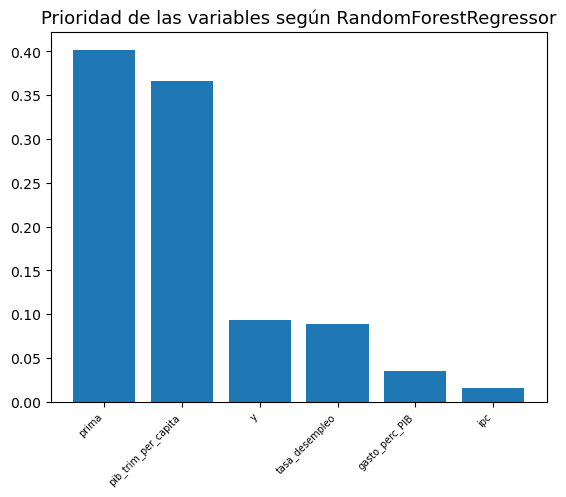

In [6]:
bestFeatures = full_dfml.drop({'ds'}, axis=1)

array = bestFeatures.values
X = array[:,1:]
y = array[:,0]
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)

importance_scores = model.feature_importances_

sorted_idx = importance_scores.argsort()[::-1]
sorted_scores = importance_scores[sorted_idx]

names = bestFeatures.columns.values[1:]
sorted_names = names[sorted_idx]
ticks = [i for i in range(len(sorted_names))]
plt.bar(ticks, sorted_scores)
plt.xticks(ticks, sorted_names, rotation=45, fontsize = 7, ha = 'right')
plt.title("Prioridad de las variables según RandomForestRegressor", fontsize=13)
plt.style.use('fivethirtyeight')
plt.show()

**Observaciones**

Podemos ver como la Prima, el PIB trimestral per cápita son los factores más relevantes.

Comprobamos los datos más relevantes con el conjunto de datos formado con las series que no cumplen todo el rango de datos que tiene el IBEX-35.

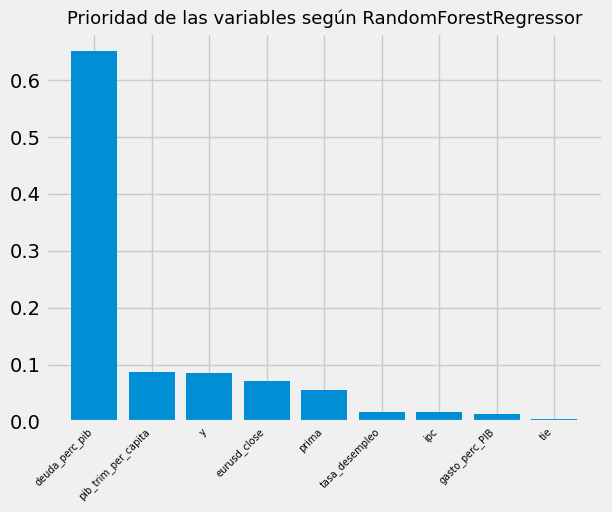

In [7]:
bestFeatures = short_dfml.drop({'ds'}, axis=1)

array = bestFeatures.values
X = array[:,1:]
y = array[:,0]
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)

importance_scores = model.feature_importances_

sorted_idx = importance_scores.argsort()[::-1]
sorted_scores = importance_scores[sorted_idx]

names = bestFeatures.columns.values[1:]
sorted_names = names[sorted_idx]
ticks = [i for i in range(len(sorted_names))]
plt.bar(ticks, sorted_scores)
plt.xticks(ticks, sorted_names, rotation=45, fontsize = 7, ha = 'right')
plt.title("Prioridad de las variables según RandomForestRegressor", fontsize=13)
plt.style.use('fivethirtyeight')
plt.show()

**Observaciones**

Vemos que cuando añadimos el resto de factores la deuda cobra importancia.

## 2.2 RFE

El Recursive Feature Elimination (RFE) es otra técnica de selección de variables el cual itera por los diferentes modelos que va creando, cada uno más simple y eficiente, seleccionando las variables más importantes. En este caso RFE usa el modelo RFR y evalúa su precisión. Al igual que RFR, se ha usado RFE de la librería Sklearn.

Empezamos con los datos que tienen el rango de fechas completo.

Selected Features:
pib_trim_per_capita
prima
tasa_desempleo
y


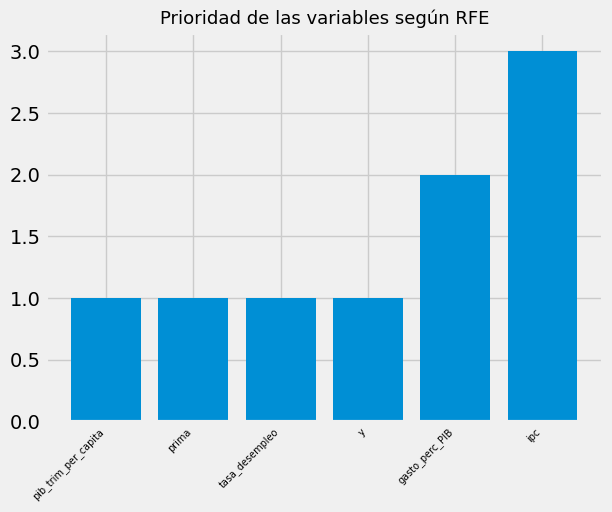

In [14]:
bestFeatures = full_dfml.drop({'ds'}, axis=1)

array = bestFeatures.values
X = array[:,1:]
y = array[:,0]

rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=4)
fit = rfe.fit(X, y)
print('Selected Features:')
names = bestFeatures.columns.values[1:]
for i in range(len(fit.support_)):
     if fit.support_[i]:
            print(names[i])
            
names = bestFeatures.columns.values[1:]
sorted_idx = fit.ranking_.argsort()
sorted_names = names[sorted_idx]
sorted_rank = fit.ranking_[sorted_idx]
ticks = [i for i in range(len(sorted_names))]
plt.bar(ticks, sorted_rank)
plt.xticks(ticks, sorted_names, rotation=45, fontsize = 7, ha = 'right')
plt.title("Prioridad de las variables según RFE", fontsize=13)
plt.show()

**Observaciones**

Podemos ver como el PIB trimestral per cápita, la Prima de riesgo y la tasa de empleo son los factores más importantes.

Selected Features:
pib_trim_per_capita
deuda_perc_pib
eurusd_close
y


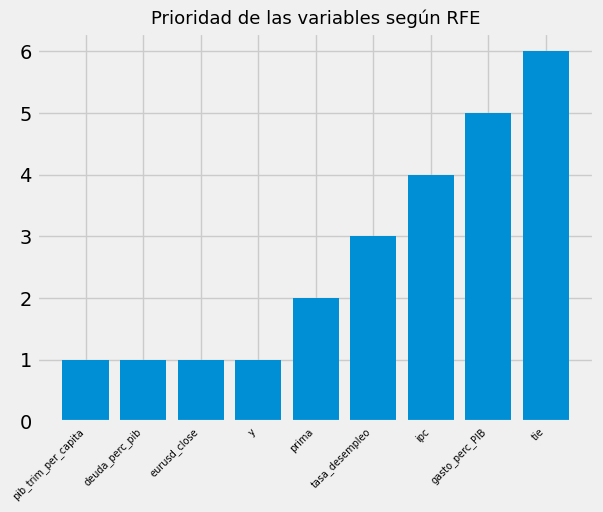

In [9]:
bestFeatures = short_dfml.drop({'ds'}, axis=1)

array = bestFeatures.values
X = array[:,1:]
y = array[:,0]

rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=4)
fit = rfe.fit(X, y)
print('Selected Features:')
names = bestFeatures.columns.values[1:]
for i in range(len(fit.support_)):
     if fit.support_[i]:
            print(names[i])
            
names = bestFeatures.columns.values[1:]
sorted_idx = fit.ranking_.argsort()
sorted_names = names[sorted_idx]
sorted_rank = fit.ranking_[sorted_idx]
ticks = [i for i in range(len(sorted_names))]
plt.bar(ticks, sorted_rank)
plt.xticks(ticks, sorted_names, rotation=45, fontsize = 7, ha = 'right')
plt.title("Prioridad de las variables según RFE", fontsize=13)
plt.show()

**Observaciones**

Si seleccionamos todas las variables podemos ver como el PIB trimestral per cápita, la deuda y el Eurusd son los más relevantes.

## 2.3 PCA

El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica comúnmente utilizada para la reducción de la dimensionalidad de un conjunto de datos grande. En este caso, PCA puede servir para ver qué variables tienen una contribución mayor en los diferentes componentes. Es decir, cuanta información explica esa variable en cada uno de los componentes. Así pues, para trabajar con PCA, lo primero que hay que hacer es estandarizar nuestra matriz de características $X$ que será proyectada sobre los componentes principales  $W$ , obteniendo así las nuevas coordenadas del conjunto de datos:

$Z=X*W$

Donde:
	$X$: Es la matriz de datos estandarizados
	$W$: Es la matriz de vectores propios
	$Z$: Es la matriz transformada que contiene los componentes principales

Una vez se ha obtenido la matriz resultante, se pueden observar las cargas de las variables originales en los componentes $w_{ij}$. Esta contribución se interpreta como la magnitud de carga en el componente. Cuanto mayor la carga, mayor será la contribución. PCA se ha usado de la librería Sklearn.


## 2.3.1 Contribución de las variables con todas las fechas con PCA

In [3]:
X = df.drop(columns=['fecha', 'ibex_close', 'deuda_perc_pib', 'tie', 'eurusd_close', 'tim'])
y = df['ibex_close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)

In [4]:
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()
varianza_acumulada

array([0.37873453, 0.56888802, 0.71373018, 0.83827354, 0.90426445,
       0.95445829, 0.9822229 , 1.        ])

Vemos que a partir del tercer componente ya explicamos un poco más del 70% de la varianza.

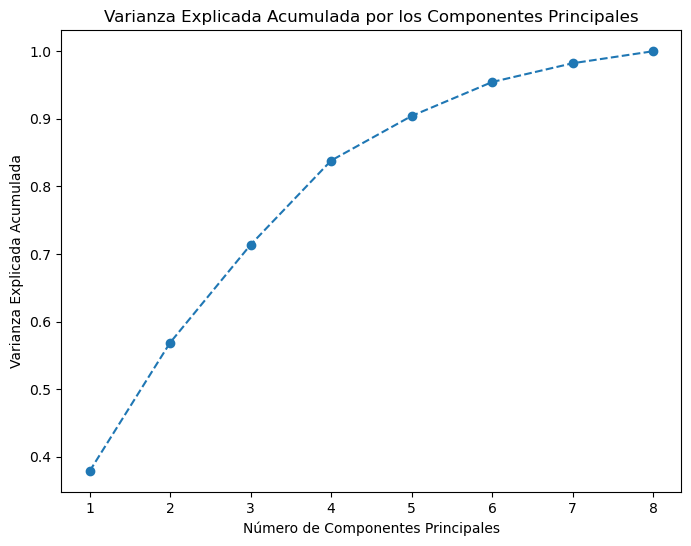

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por los Componentes Principales')
plt.show()


In [16]:
cargas = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(len(varianza_explicada))])

In [8]:
cargas_absolutas = cargas.abs()
contribucion_total = cargas_absolutas.sum(axis=0)
ranking_contribucion = contribucion_total.sort_values(ascending=False)
ranking_contribucion

prima                  2.557131
ibex_volume            2.484245
gasto_perc_PIB         2.421650
tasa_desempleo         2.272416
var_anual_pib          2.268922
pib_trim_per_capita    2.207634
var_pib                2.073457
ipc                    1.666815
dtype: float64

**Observaciones**

Vemos como la Prima de riesgo, el volúmen del IBEX, el gasto del PIB y la tasa de desempleo son los factores que más contribuyen.

## 2.3.2 Contribución de todas las variables con PCA


In [17]:
df['fecha'] = pd.to_datetime(df['fecha'])
df_filtrado = df[df['fecha'] >= '2010-01-12']

X = df_filtrado.drop(columns=['fecha', 'ibex_close'])
y = df['ibex_close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)


In [18]:
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()
varianza_acumulada

array([0.33646133, 0.53325198, 0.63538359, 0.72437424, 0.81190068,
       0.88643497, 0.92717089, 0.9577301 , 0.98274389, 0.99504486,
       0.99856275, 1.        ])

Si usamos todas las variables, no es hasta el cuarto componente que explicamos un poco más del 70% de la varianza.

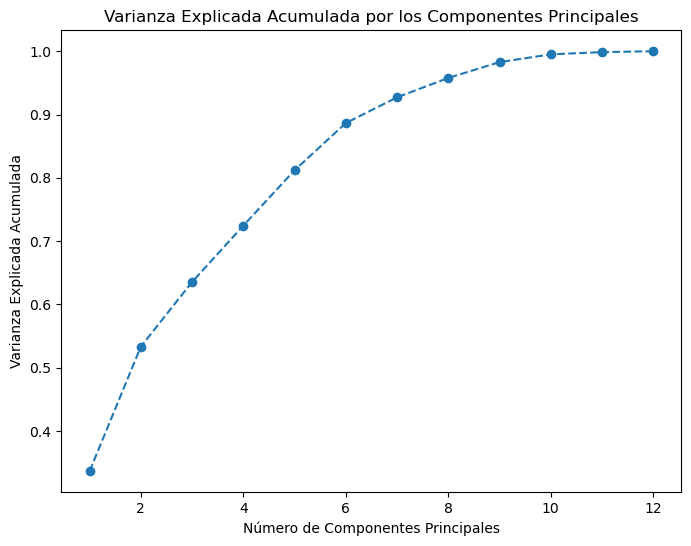

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por los Componentes Principales')
plt.show()


In [20]:
cargas = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(len(varianza_explicada))])

In [21]:
cargas_absolutas = cargas.abs()
contribucion_total = cargas_absolutas.sum(axis=0)
ranking_contribucion = contribucion_total.sort_values(ascending=False)
ranking_contribucion

gasto_perc_PIB         2.971683
prima                  2.887746
var_anual_pib          2.851320
tasa_desempleo         2.823183
deuda_perc_pib         2.797426
ibex_volume            2.743999
tie                    2.704832
var_pib                2.644765
eurusd_close           2.577356
tim                    2.382572
pib_trim_per_capita    2.285732
ipc                    2.154885
dtype: float64

En este caso, el gasto del PIB, la Prima, la varianza anual del PIB, la Tasa de desempleo, la deuda, el volumne del IBEX y los Tipos de interés són los que más contribuyen.

## 2.4 Correlación de los factores con ibex_close

La correlación es una medida estadística que describe el grado y la dirección de la relación lineal entre dos variables. Es decir, mide cómo de bien se alinean las variaciones de una variable con las variaciones de otra. Si dos variables aumentan o disminuyen juntas, su correlación será positiva. Si una variable aumenta mientras la otra disminuye, la correlación será negativa.

$
r = \frac{\sum (X_i - \overline{X})(Y_i - \overline{Y})}{\sqrt{\sum (X_i - \overline{X})^2 \sum (Y_i - \overline{Y})^2}}
$

Donde:

- $r$ es el coeficiente de correlación de Pearson.
- $X_i$ y $Y_i$ son los valores individuales de las variables $X$ e $Y$.
- $\overline{X}$ y $\overline{Y}$ son las medias de las variables $X$ e $Y$.


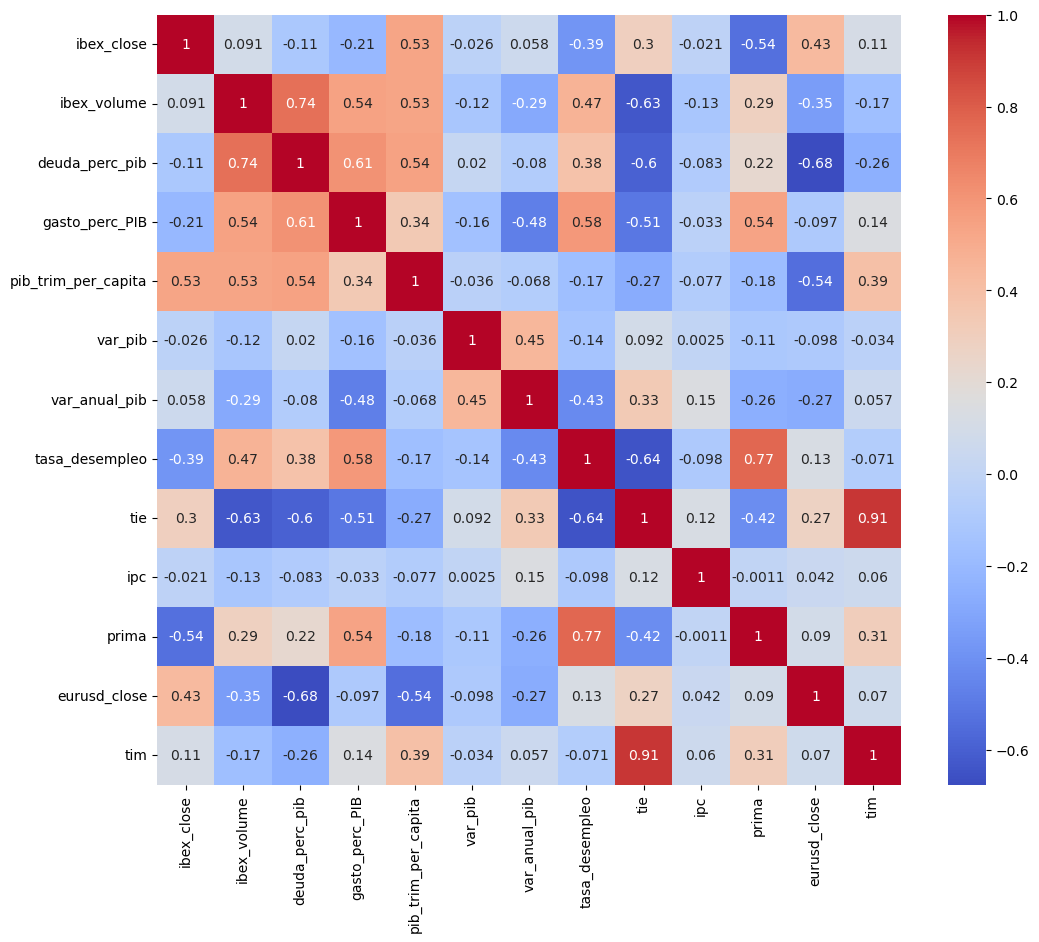

In [39]:
plt.figure(figsize=(12, 10)) 
corr_matrix = df.drop(columns=["fecha"]).corr()  
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

**Observaciones**

Los resultados de la correlación de Pearson nos muestra como el PIB trimestral per cápita, la tasa de desempleo, la Prima de riesgo y el Eurusd son los más correlacionados con el cierre del IBEX (ibex_close).

Finalmente, se decide escoger la Deuda, el PIB trimestral por cápita, la Prima de riesgo y la tasa de desempleo como factores exógenos que analizaremos y usaremos para la predicción del IBEX-35.

In [3]:
df = df[["ibex_close", "deuda_perc_pib", "pib_trim_per_capita", "prima", "tasa_desempleo", "fecha"]]

## 2.5 Función de correlación cruzada con ibex_close

Por último, se ha realizado una correlación cruzada para ver la relación entre la variable dependiente ‘ibex_close’ y los demás factores exógenos. En este caso, el propósito es identificar cómo se afectan mutuamente las series en diferentes lags. Para usar la correlación cruzada se ha usado la librería Statsmodels.

$
R_{XY}(\tau) = \sum_{t} X(t) \cdot Y(t + \tau)
$

Donde:
- $R_{XY}(\tau)$ es la correlación cruzada entre $X(t)$ y $Y(t)$ para un desfase temporal $\tau$.
- $X(t)$ y $Y(t)$ son las dos series temporales que se están comparando.
- $\tau$ es el desfase temporal entre las dos series, es decir, cuánto se desplaza una serie respecto a la otra.


El resultado que nos proporciona esta librería son unos correlogramas donde el eje X representan los lags. Es decir, indican el desfase temporal entre las series. Mientras que el eje Y muestra los coeficientes de correlación cruzada PXY(k) que pueden tomar valores entre -1 y 1. Así pues, en la gráfica se pueden ver picos positivos, que significan que hay lags en que las dos series aumentan o disminuyen juntas; picos negativos, que indican que hay lags en los que una serie aumenta mientras la otra disminuye; y por último, si vemos que la línea va muy junta del valor 0 del eje Y significa que no hay una correlación muy fuerte en ese lag.


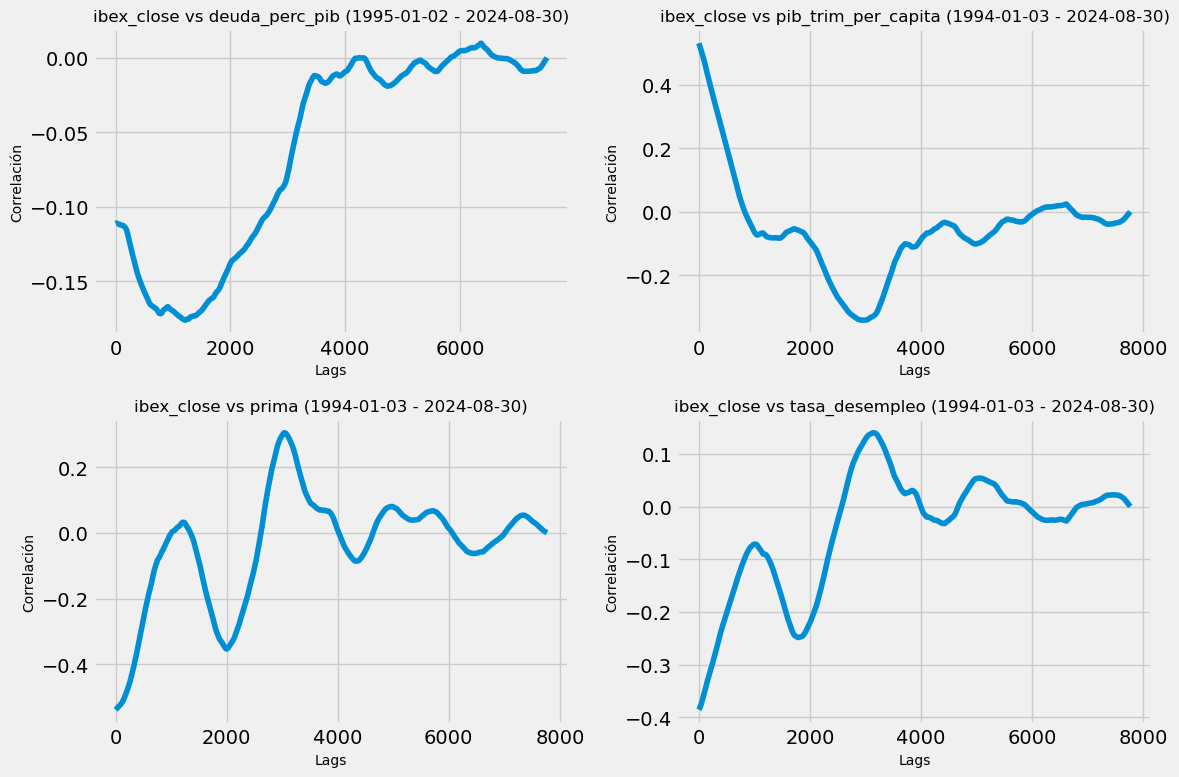

In [23]:
df_ccf = df.set_index('fecha')

exogenas = [col for col in df_ccf.columns if col != 'ibex_close']

n_cols = 2
n_rows = math.ceil(len(exogenas) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()  

for i, exogena in enumerate(exogenas):
    combined = df_ccf[['ibex_close', exogena]].dropna()
    correlacion_cruzada = ccf(combined['ibex_close'], combined[exogena], adjusted=False)
    
    axes[i].plot(correlacion_cruzada)
    axes[i].set_title(f"ibex_close vs {exogena} ({combined.index.min()} - {combined.index.max()})", fontsize=12)
    axes[i].set_xlabel("Lags", fontsize=10)
    axes[i].set_ylabel("Correlación", fontsize=10)
    axes[i].grid(True)

for j in range(len(exogenas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observaciones**

- **Deuda pública**: En el correlograma se observa que en los primeros 4000 lags, la correlación es negativa, alcanzando un valor de -0.175. Esto indica que, en ese intervalo de desfase temporal, el IBEX-35 tiende a bajar a medida que la deuda aumenta. Sin embargo, después de los primeros 4000 lags, la correlación se vuelve muy pequeña y no significativa, sugiriendo que la relación entre el IBEX-35 y la deuda pierde relevancia a medida que el desfase temporal aumenta. Este análisis sugiere que la influencia de la deuda sobre el IBEX-35 es transitoria y que la relación pierde fuerza a medida que se extiende el tiempo.

- **PIB trimestral por cápita**: PIB trimestral por cápita: Se observa que en los primeros lags hay una correlación positiva bastante fuerte, cercana a 0.50, lo que indica que el PIB trimestral per cápita y el IBEX-35 tienden a subir juntos en ese intervalo. A medida que aumentan los lags, la correlación disminuye progresivamente hasta acercarse a 0 en el lag 1000. Posteriormente, se observa un pico negativo alrededor del lag 3000, sugiriendo que, en ese desfase temporal, el aumento del PIB trimestral por cápita podría estar asociado con una caída en el IBEX-35. No es hasta alrededor del lag 4000 cuando la relación se estabiliza cerca de 0, lo que sugiere que, a largo plazo, la relación entre el PIB per cápita y el IBEX-35 se debilita o se vuelve insignificante. Este análisis sugiere que el PIB trimestral por cápita tiene una relación positiva con el IBEX-35 a corto plazo, pero esta relación cambia a medida que el desfase temporal se alarga.
- **Prima de riesgo**: En los primeros lags, se observa un pico negativo que llega a aproximadamente -0.50 en la correlación, lo que indica que cuando la prima de riesgo sube, el valor de cierre del IBEX-35 tiende a bajar. Más adelante, la correlación disminuye a 0 después del lag 1000, pero luego experimenta un repunte negativo, alcanzando una correlación de -0.30 alrededor del lag 2000. Posteriormente, la correlación vuelve a aumentar a 0.30 en el lag 3000, antes de estabilizarse. Este patrón sugiere que la relación entre la prima de riesgo y el IBEX-35 es compleja y cambia a lo largo del tiempo, con efectos negativos a corto plazo seguidos de una relación más débil o fluctuante a largo plazo.
- **Tasa de desempleo**: La tasa de desempleo muestra una relación con el IBEX-35 similar a la de la prima de riesgo. En los primeros lags, se observa una correlación negativa, lo que indica que cuando la tasa de desempleo sube, el valor de cierre del IBEX-35 tiende a bajar. Posteriormente, la correlación se aproxima a 0, sugiriendo una relación débil o nula en esos lags. Luego, la correlación fluctúa, bajando nuevamente y posteriormente aumentando, antes de estabilizarse alrededor del lag 4000. Este comportamiento sugiere que, en el corto plazo, la tasa de desempleo tiene una relación inversa con el IBEX-35, pero con el tiempo, la relación pierde fuerza y se estabiliza, mostrando una interacción menos significativa a largo plazo.

# 3. Análisis de las series temporales

## 3.1 Distribución temporal de los factores

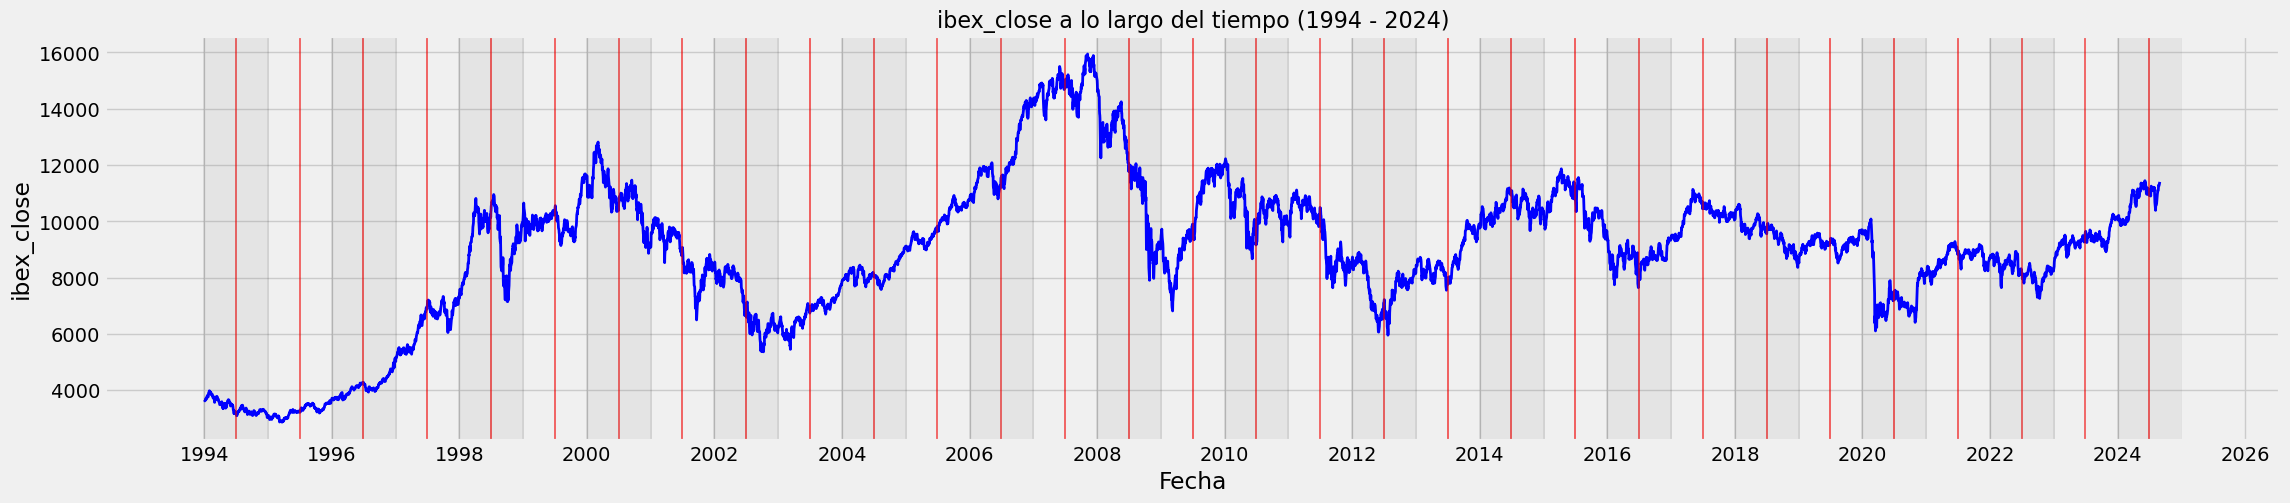

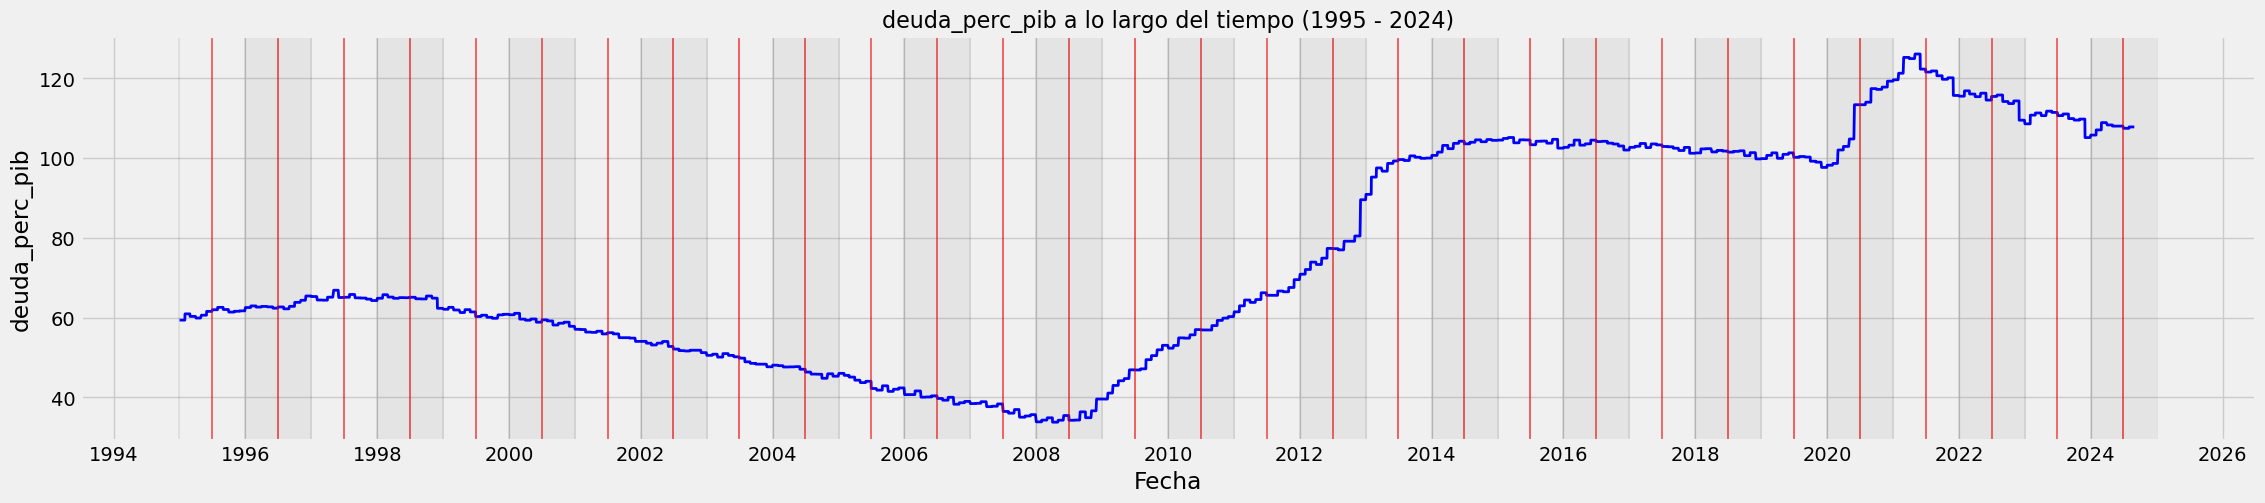

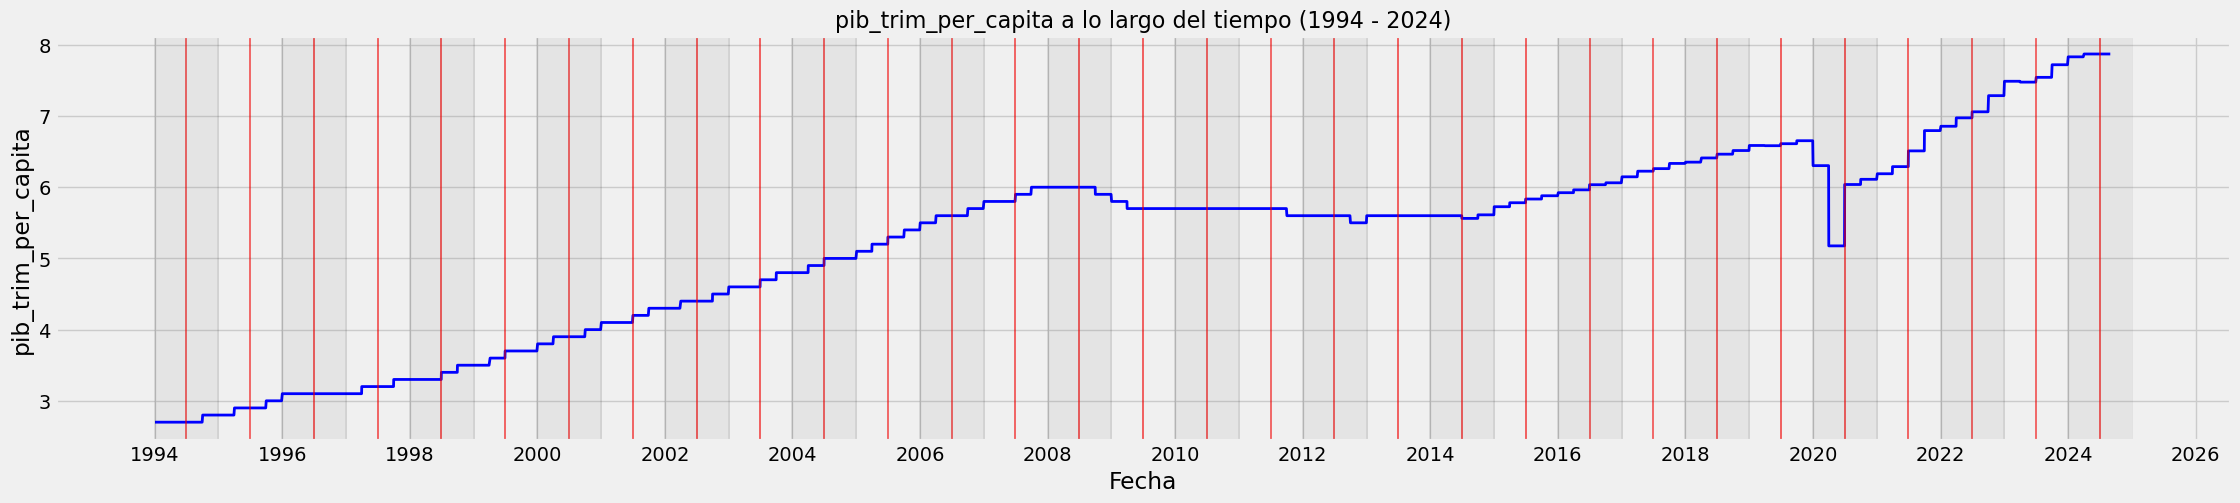

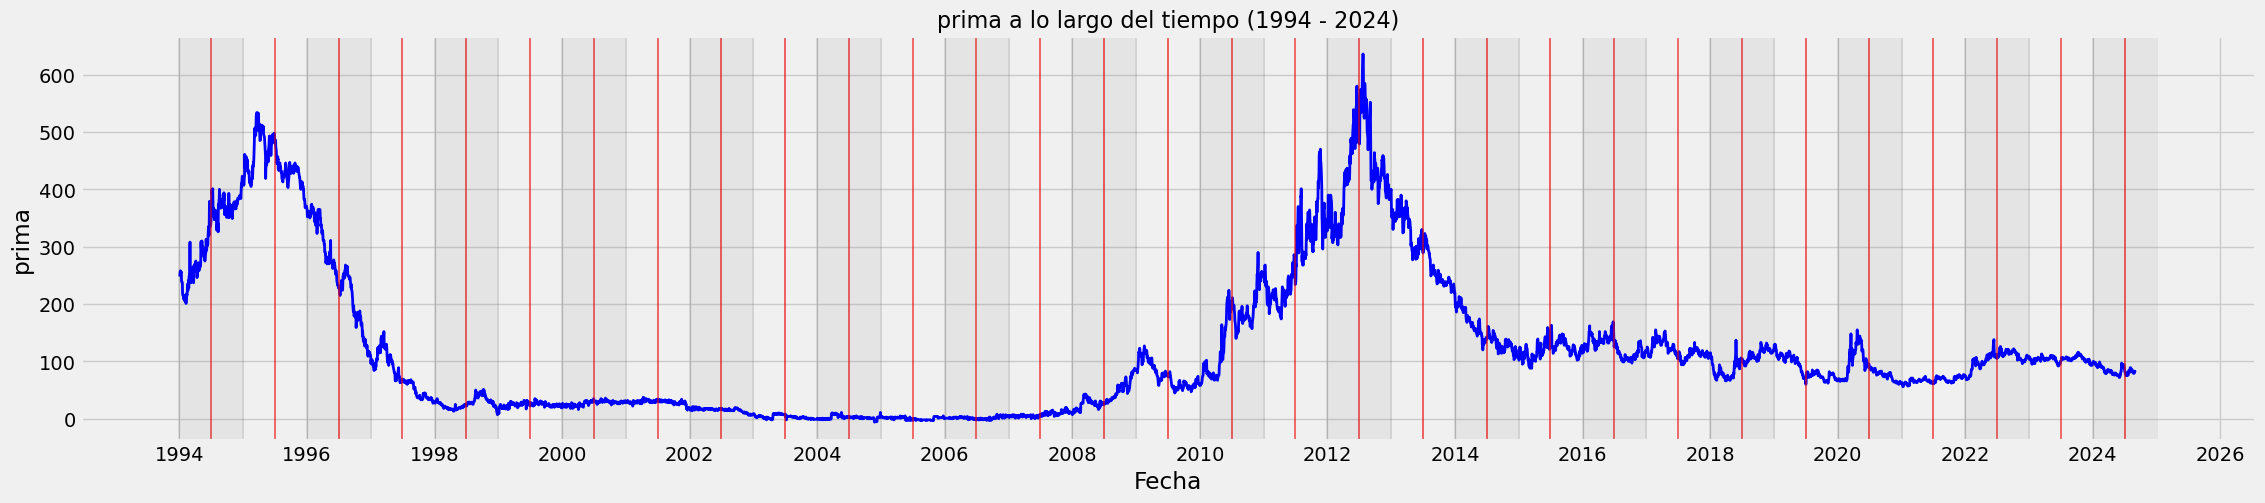

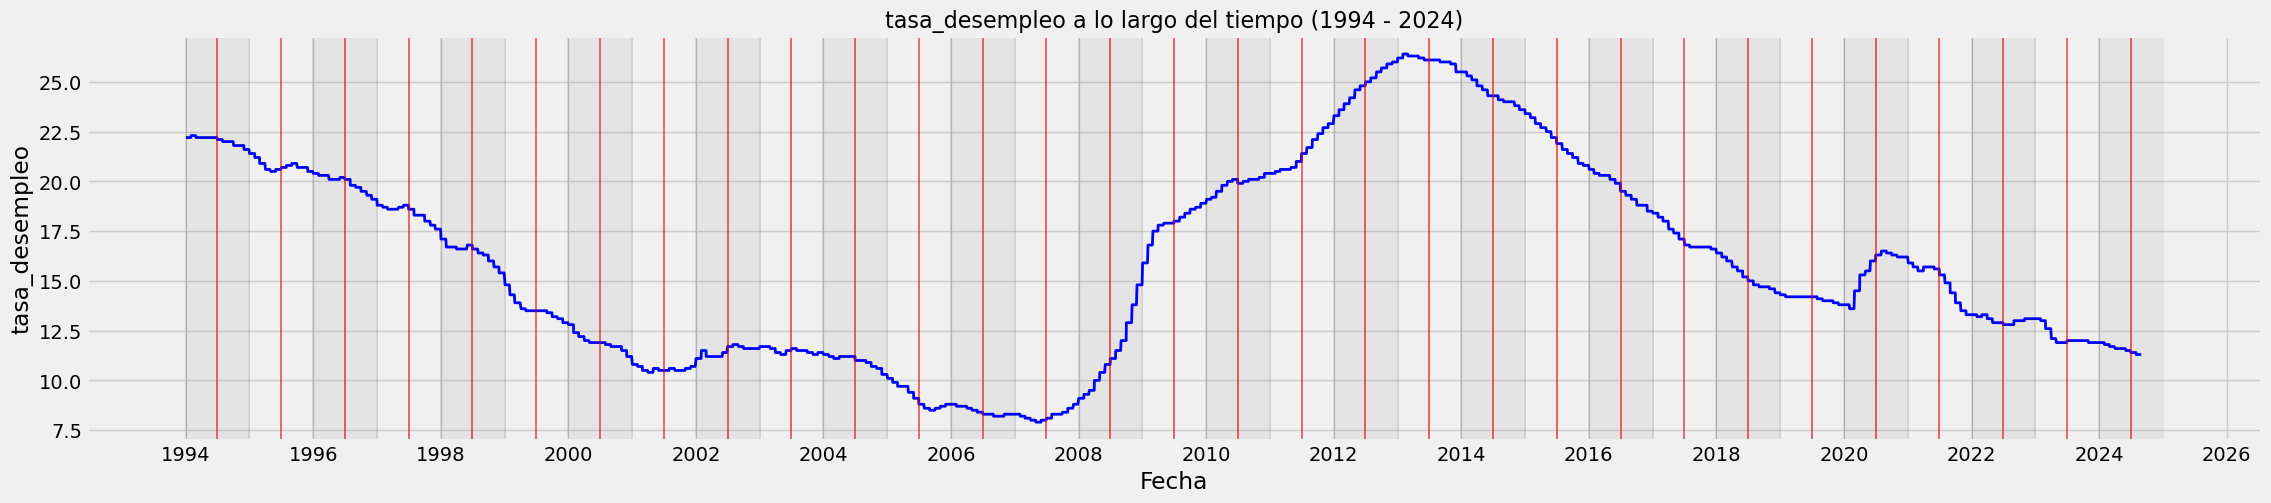

In [24]:
df['fecha'] = pd.to_datetime(df['fecha'])

numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    current_factor = df[['fecha', col]].dropna()
    
    fig, ax = plt.subplots(figsize=(25, 5))
    ax.plot(current_factor['fecha'], current_factor[col], linewidth=2, color='blue')

    ax.set_xlabel('Fecha')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo del tiempo ({current_factor.fecha.dt.year.min()} - {current_factor.fecha.dt.year.max()})', fontsize=16)

    xtick_labels = []
    xticks = []
    years_processed = set()

    for i, idx in enumerate(current_factor['fecha']):
        year = idx.year
        if idx.month == 1 and year not in years_processed:
            xtick_labels.append(str(year))
            ax.axvline(x=idx.replace(month=1, day=1), color='black', linestyle='solid', linewidth=0.1)
            xticks.append(i)
            if idx.year % 2 == 0:
                start_of_year = idx.replace(month=1, day=1)
                ax.axvspan(start_of_year, start_of_year.replace(year=year + 1), color='grey', alpha=0.1)
            years_processed.add(year)
        elif idx.month == 7:
            xtick_labels.append('')
            ax.axvline(x=idx.replace(month=7, day=1), color='red', linestyle='-', linewidth=0.05)
            xticks.append(i)
        else:
            xtick_labels.append('')
            xticks.append(i)

    ax.xaxis.set_major_locator(mdates.YearLocator(2)) 
    
    plt.show()

**Observaciones**

- **Cierre del IBEX-35**: La evolución del IBEX-35 refleja de manera significativa los eventos históricos y económicos globales a lo largo de los años. Entre 1996 y 2000, el índice experimentó un notable auge debido al crecimiento de las nuevas tecnologías y el aumento de la renta variable, lo que impulsó el precio de cierre del IBEX-35. Sin embargo, a partir de 2001, el mercado comenzó a enfrentar una serie de crisis y periodos de inestabilidad global, que afectaron negativamente a las empresas españolas, reflejándose en una caída de los precios. Hacia 2003, el índice comienza a recuperar terreno, coincidiendo con el auge de la burbuja inmobiliaria, que finalmente estallaría en 2008, lo que originó la gran crisis financiera global. Esta crisis se reflejó en un descenso drástico del IBEX-35, aunque tras la crisis, a partir de 2010, se experimentó una cierta estabilización en el mercado, con menores niveles de volatilidad en comparación con los años previos. No obstante, la segunda recesión de la zona euro, en 2012, también tuvo su impacto, provocando otra caída en el índice. A partir de 2014, el IBEX-35 mostró una tendencia más estable, aunque con algunos periodos de fluctuación. Un evento particularmente dramático fue la caída de 2020, cuando la pandemia de COVID-19 generó una caída abrupta en los mercados globales, incluido el IBEX-35. Sin embargo, en los últimos años, se ha observado una recuperación gradual, con un aumento sostenido en el precio de cierre, aunque el mercado sigue afectado por incertidumbres globales y crisis sanitarias, políticas y económicas.
- **Deuda pública**: La evolución de la deuda pública española ha mostrado una tendencia más estable en comparación con el IBEX-35, con menos volatilidad. A partir de 1998, se observa una disminución sostenida de la deuda pública, un período en el que la economía española experimentó una relativa estabilidad y crecimiento. Sin embargo, con el estallido de la crisis financiera global en 2008, la deuda pública se disparó rápidamente debido a los planes de rescate y estímulos fiscales necesarios para hacer frente a la recesión. Esta crisis financiera marcó un punto de inflexión, elevando la deuda de manera significativa. A partir de ese momento, aunque la deuda pública continuó aumentando durante la década posterior, el ritmo de crecimiento se moderó tras la estabilización económica que siguió a la crisis. La crisis de la deuda soberana de la zona euro (2010-2012) también contribuyó a un aumento adicional en la deuda pública de España. Sin embargo, en 2020, con la llegada de la pandemia de COVID-19, la deuda volvió a aumentar drásticamente debido a los gastos extraordinarios asociados con las medidas de confinamiento y estímulos económicos. A pesar de esto, en los últimos años se ha observado una tendencia a la baja en la deuda pública, con esfuerzos para reducir el déficit y aplicar políticas fiscales más prudentes, aunque los desafíos económicos derivados de la recuperación post-pandemia siguen presentes.
- **PIB trimestral por cápita**: El PIB trimestral per cápita experimentó un crecimiento sostenido hasta el año 2008, coincidiendo con el período de expansión económica en España. Durante estos años, la economía española se benefició de un aumento en la inversión, el consumo y la actividad económica general, lo que resultó en un crecimiento constante del PIB per cápita. Sin embargo, tras el estallido de la crisis financiera global en 2008, la economía española sufrió una desaceleración significativa, lo que llevó a una estabilización y posterior caída en el PIB trimestral per cápita. A partir de 2015, el PIB per cápita comenzó a experimentar una recuperación, impulsada por la estabilización económica, las reformas estructurales y una creciente recuperación en los sectores clave como la construcción, los servicios y las exportaciones. Esta tendencia al alza continuó hasta el comienzo de la pandemia de COVID-19 en 2020, que provocó una caída brusca del PIB debido a los confinamientos, las interrupciones económicas y las restricciones sanitarias. Sin embargo, en los últimos años, el PIB per cápita ha mostrado signos de recuperación, gracias a la reactivación de la economía, el aumento de la demanda interna y las políticas de estímulo económico adoptadas durante la crisis sanitaria. A pesar de los desafíos globales y las incertidumbres, el PIB trimestral per cápita ha comenzado a subir nuevamente en los últimos trimestres.
- **Prima de riesgo**: La prima de riesgo ha mostrado dos picos significativos a lo largo del tiempo. El primero ocurrió en 1995, durante una etapa de inestabilidad económica global y local, que generó incertidumbre en los mercados financieros y afectó la percepción del riesgo en España. Este pico refleja un aumento de la percepción del riesgo país, lo que llevó a un aumento en la diferencia de rendimiento entre los bonos españoles y los alemanes. El segundo pico notable ocurrió en 2013, en el contexto de la crisis de la deuda soberana de la eurozona y la recesión económica en España. La prima de riesgo alcanzó niveles elevados debido a la preocupación por la capacidad de España para hacer frente a su deuda, así como por las tensiones fiscales y la incertidumbre política en ese momento. Fuera de estos dos picos, la prima de riesgo ha mostrado períodos de relativa estabilidad, con oscilaciones menores a lo largo del tiempo, reflejando una percepción más equilibrada del riesgo país por parte de los inversores. Sin embargo, estos picos resaltan momentos de gran turbulencia económica y financiera que marcaron la historia reciente de España.
- **Tasa de desempleo**: La tasa de desempleo presenta una tendencia a la baja al principio de la serie, reflejando el crecimiento económico y la expansión del empleo en España durante la década de los 90 y principios de los 2000. Este período de disminución del desempleo estuvo impulsado por el auge de sectores como la construcción y los servicios, que generaron una notable creación de empleo. Sin embargo, con el estallido de la crisis financiera global de 2008, la tasa de desempleo se disparó de manera estrepitosa. La crisis económica afectó gravemente al mercado laboral, y el desempleo alcanzó niveles muy altos debido a la recesión, los despidos masivos y la reducción de la actividad económica. Tras la crisis, la tasa de desempleo comenzó a descender de manera progresiva, aunque de forma más lenta, a medida que la economía se fue recuperando, especialmente después de la segunda recesión que ocurrió a principios de la década de 2010. En 2020, la tasa de desempleo experimentó nuevamente un aumento debido a los efectos económicos de la pandemia de COVID-19, que provocó cierres masivos de negocios, parálisis en varias industrias y un aumento de la incertidumbre en el mercado laboral. Sin embargo, en los últimos años, la tasa de desempleo ha mostrado una tendencia a la baja nuevamente, reflejando la recuperación económica post-COVID y la estabilización del mercado laboral.

## 3.2 Variabilidad de los datos

Para analizar la variabilidad se ha calculado el coeficiente de variación a partir de la media y la desviación estándar. “El CV es una medida que nos dice cómo de agrupado es un conjunto de datos” (Sujit, S., 2015).

CV = $(σ / μ) * 100$

Donde:

- **σ**: Mide la dispersión de los datos respecto a la media. Indica la cantidad de variabilidad en las observaciones.

- **μ**: Es el valor medio de la serie temporal.

Un valor de CV más elevado nos dirá que la serie tiene bastante variabilidad. En nuestro caso, cómo estamos trabajando con factores económicos, la volatilidad es muy presente, por lo que los resultados pueden ser bastante altos.

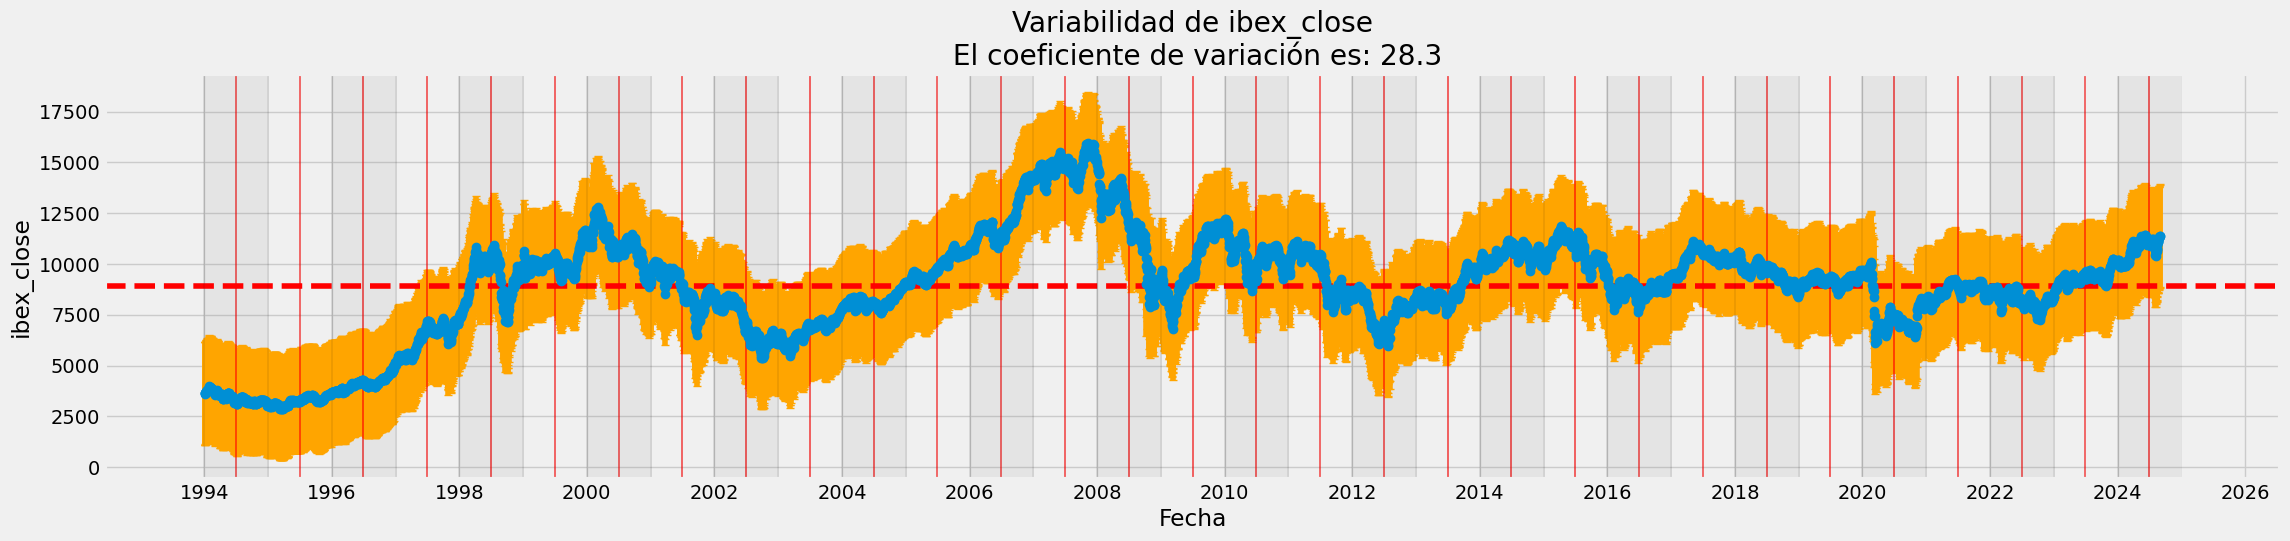

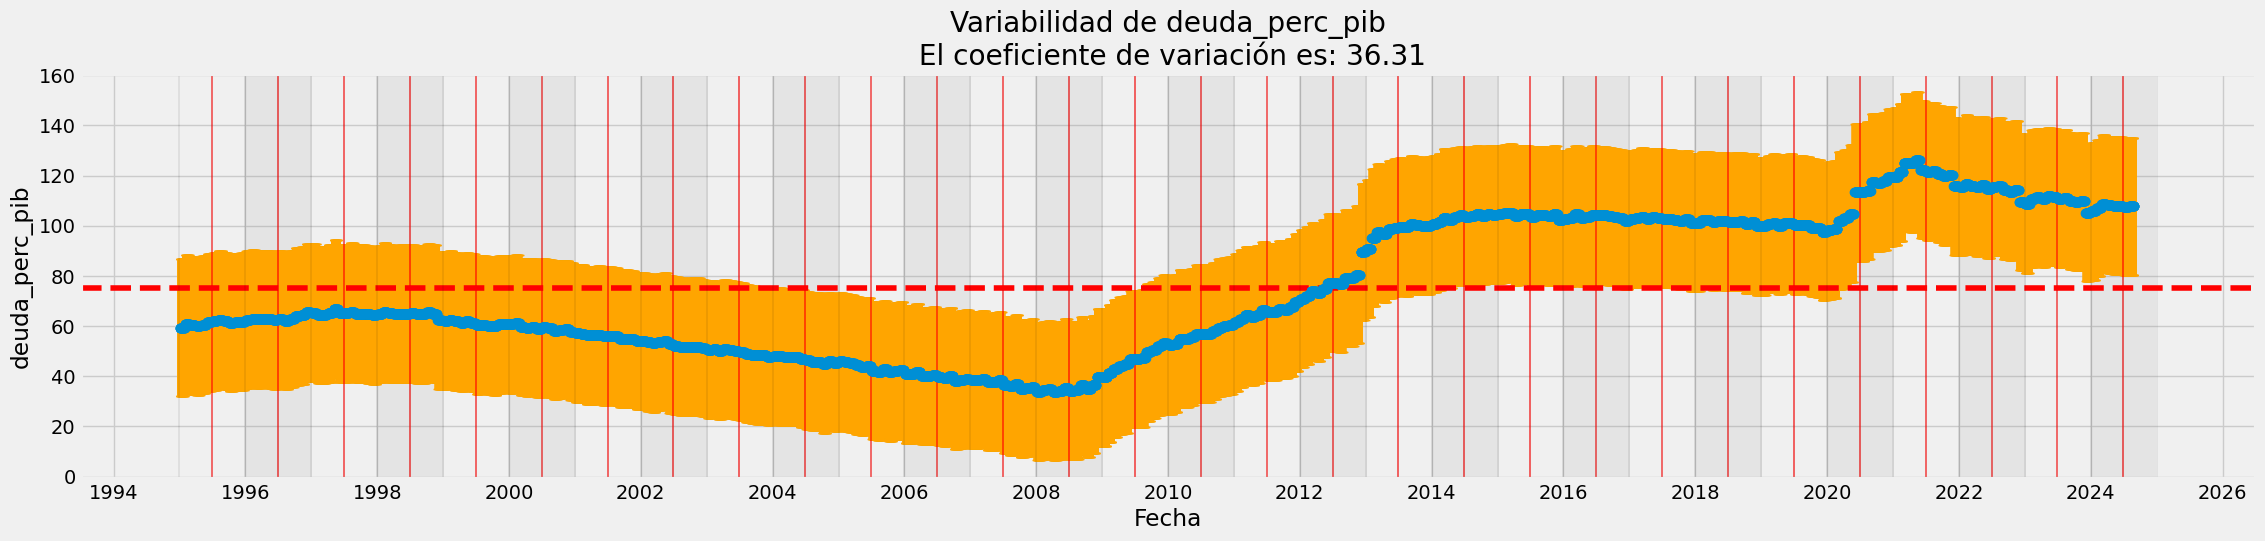

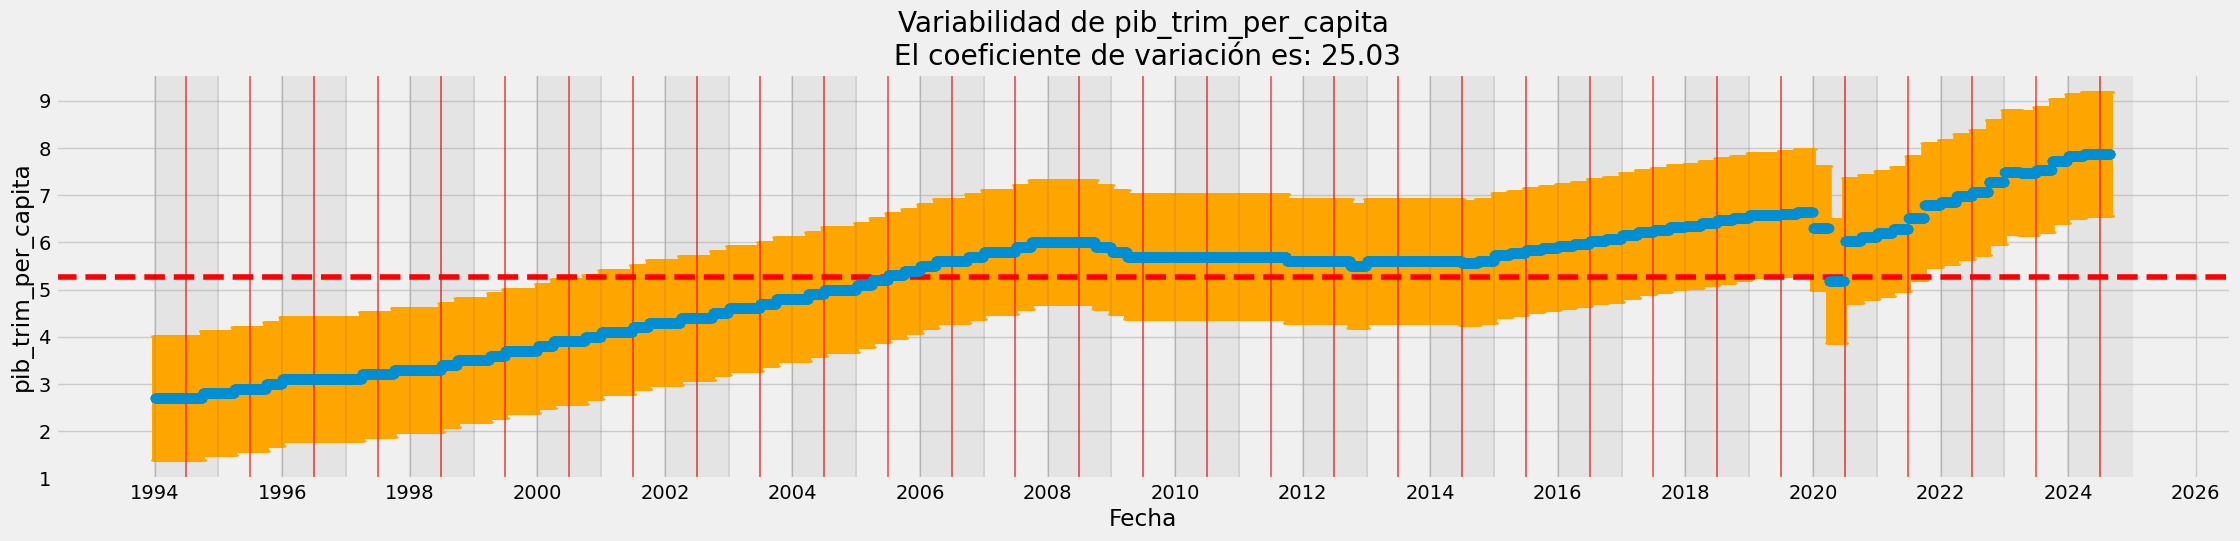

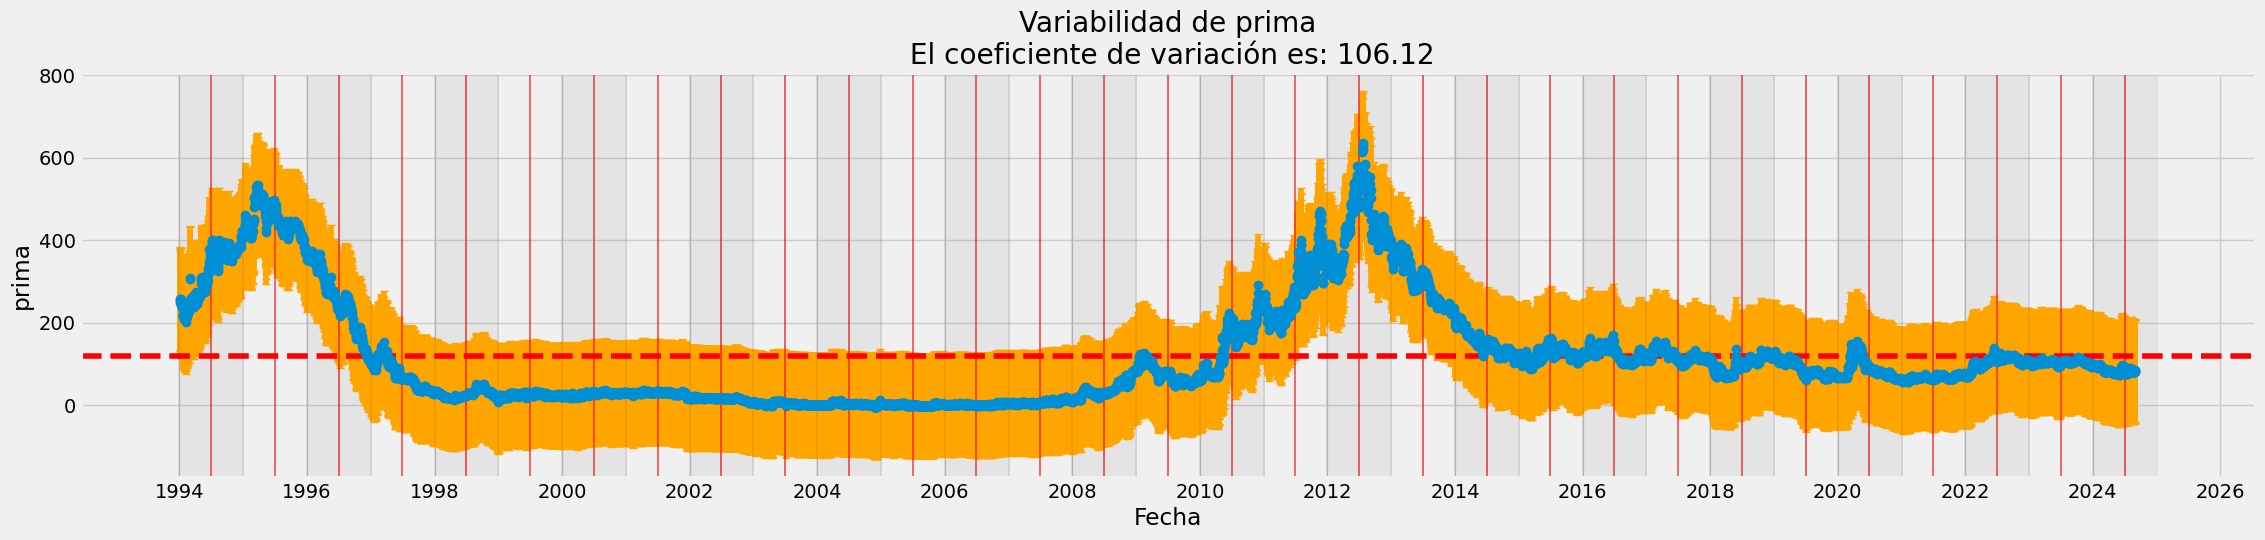

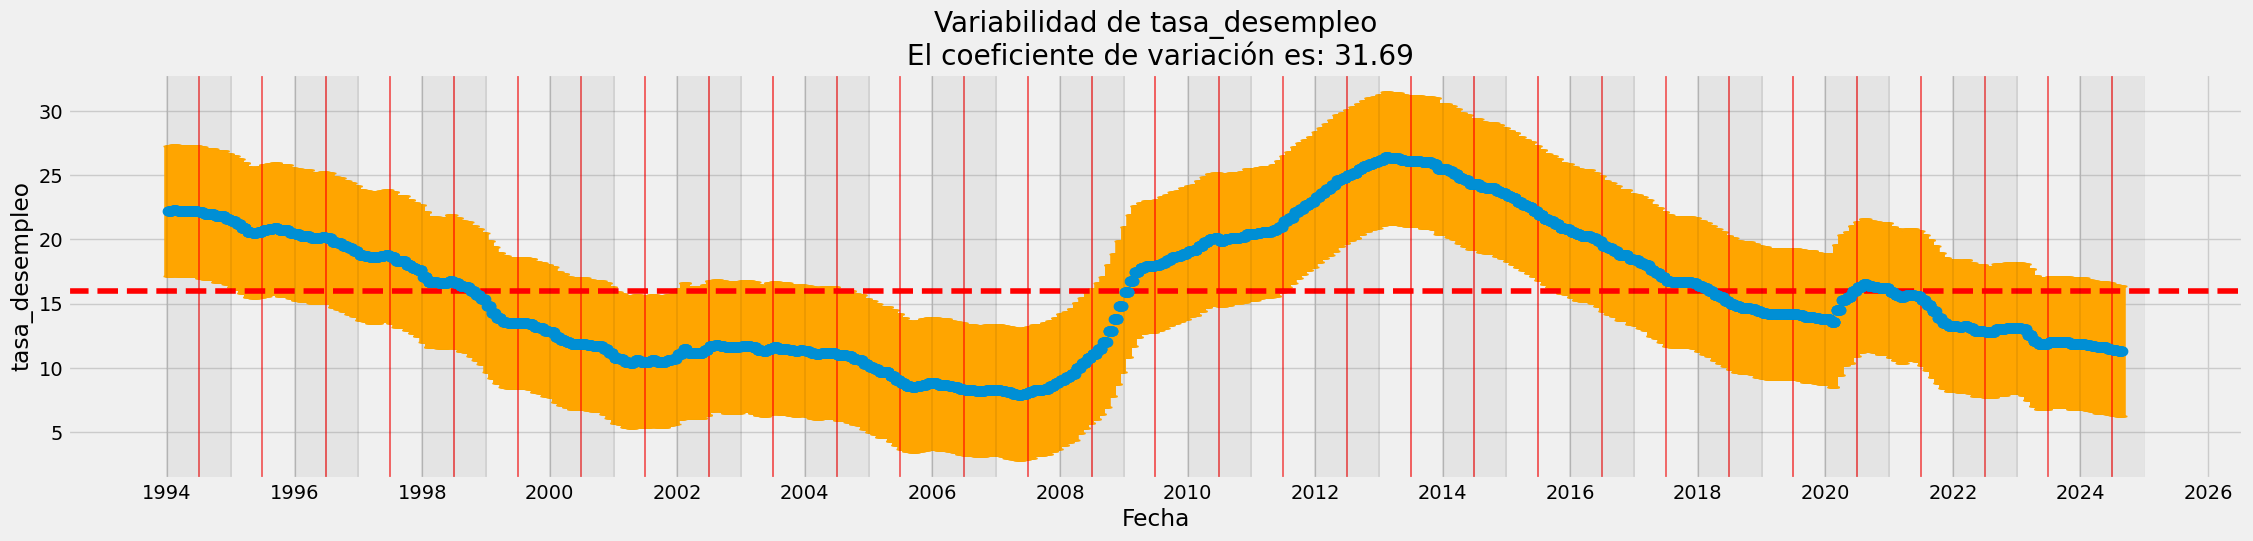

In [25]:
df['fecha'] = pd.to_datetime(df['fecha'])

numeric_columns = df.select_dtypes(include='number').columns
count = 0
for col in numeric_columns:
    count += 1
    current_factor = df[['fecha', col]].dropna()
    mean_factor = np.mean(current_factor[col])
    std_factor = np.std(current_factor[col])
    cv = round((std_factor / mean_factor) * 100, 2)
    
    
    
    fig, ax = plt.subplots(figsize=(25, 5))
    ax.errorbar(current_factor.fecha, current_factor[col], yerr=std_factor, fmt='o', ecolor='orange', capsize=3)
    ax.axhline(mean_factor, color='red', linestyle='--', label='Mitjana')
    ax.set_title(f'Variabilidad de {col}\n El coeficiente de variación es: {cv}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel(col)

    
    xtick_labels = []
    xticks = []
    years_processed = set()

    for i, idx in enumerate(current_factor['fecha']):
        year = idx.year
        if idx.month == 1 and year not in years_processed:
            xtick_labels.append(str(year))
            ax.axvline(x=idx.replace(month=1, day=1), color='black', linestyle='solid', linewidth=0.1)
            xticks.append(i)
            if idx.year % 2 == 0:
                start_of_year = idx.replace(month=1, day=1)
                ax.axvspan(start_of_year, start_of_year.replace(year=year + 1), color='grey', alpha=0.1)
            years_processed.add(year)
        elif idx.month == 7:
            xtick_labels.append('')
            ax.axvline(x=idx.replace(month=7, day=1), color='red', linestyle='-', linewidth=0.05)
            xticks.append(i)
        else:
            xtick_labels.append('')
            xticks.append(i)

    ax.xaxis.set_major_locator(mdates.YearLocator(2)) 

**Observaciones**

- **Cierre del IBEX-35 (28.3)**: El coeficiente de variación de 28.3 indica que el IBEX-35 presenta una variabilidad considerable, lo que es coherente con su naturaleza de índice bursátil, que tiende a experimentar fluctuaciones diarias y reacciones a eventos económicos, políticos y financieros. Un valor de 28.3 es relativamente alto, lo que muestra que los precios de cierre del IBEX-35 tienen una alta volatilidad en relación con su media.

- **Deuda pública (36.31)**: La deuda pública muestra un CV de 36.31, lo cual también indica una variabilidad considerable. Aunque la deuda pública tiende a ser más estable que los índices bursátiles, las crisis financieras, los cambios en las políticas fiscales y las fluctuaciones en la economía pueden generar variaciones notables en el nivel de la deuda. Este valor alto refleja cómo la deuda pública puede ser sensible a situaciones excepcionales, como crisis económicas o políticas expansivas.

- **PIB trimestral por cápita (25.03)**: Un CV de 25.03 para el PIB trimestral per cápita también señala una variabilidad moderada. Aunque el PIB tiende a seguir una tendencia de crecimiento a largo plazo, los ciclos económicos y las recesiones pueden generar fluctuaciones más o menos pronunciadas, como se vio en la crisis financiera de 2008 o la recesión causada por la pandemia de COVID-19. Este valor refleja la capacidad del PIB para fluctuar dependiendo de las condiciones macroeconómicas.

- **Prima de riesgo (106.12)**: La prima de riesgo presenta el valor más alto del conjunto con un CV de 106.12. Esto es indicativo de una alta volatilidad, lo cual es consistente con el comportamiento de la prima de riesgo. La prima de riesgo refleja la diferencia entre los bonos del gobierno español y los bonos alemanes, y está fuertemente influenciada por la percepción del riesgo de la economía española. Momentos de crisis o inestabilidad política pueden generar picos muy pronunciados en la prima de riesgo, lo que resulta en un alto coeficiente de variación.

- **Tasa de desempleo (31.69)**: Finalmente, la tasa de desempleo tiene un CV de 31.69. Esto indica que, si bien la tasa de desempleo tiende a seguir una trayectoria relativamente estable, la crisis económica y otros factores como los cambios en las políticas laborales o los efectos de la pandemia pueden generar fluctuaciones significativas. Un CV de 31.69 sugiere que hay una variabilidad considerable, especialmente en periodos de crisis económica.

## 3.3 Tendencia

La tendencia no es nada más que la dirección general y el patrón de crecimiento o disminución de los valores a lo largo del tiempo y que se puede entender como:

tendencia = $currentFactor_{t-1}$ + $currentFactor_t$

dónde:

- **$currentFactor_{t-1}$**: representa el valor del factor al instante de tiempo t-1
- **$currentFactor_t$**: representa lel valor del factor al instante de tiempo t.

Así pues, la tendencia nos permite ver la evolución general de los datos. En caso de que la tendencia sea creciente, significará que los valores medios están aumentando a lo largo del tiempo. I en caso contrario si la tendencia es a la baja. En cambio, si la serie presenta una tendencia horizontal, querrá decir que los valores medios se mantienen constantes en el tiempo. En este trabajo se ha analizado la tendencia y se ha establecido un nivel de significancia del 0.05 para aceptar la hipótesis nula en caso de que el resultado sea menor a este valor de p. Es decir, si el valor de p < 0.05 significará que hay suficiente confianza para concretar que existe tendencia en la serie.

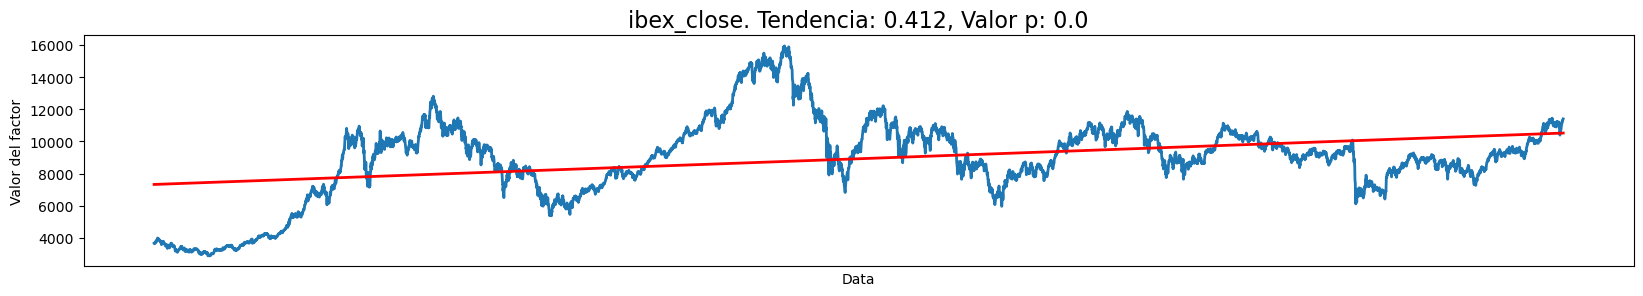

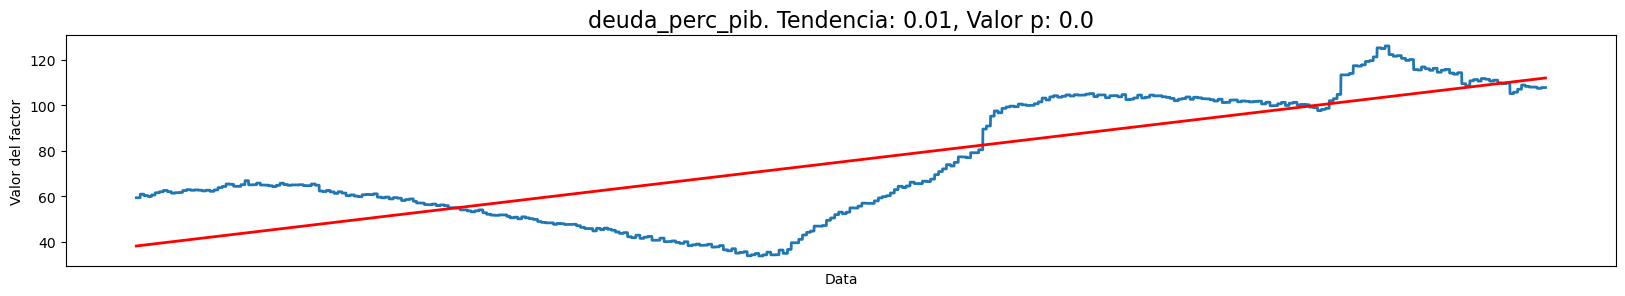

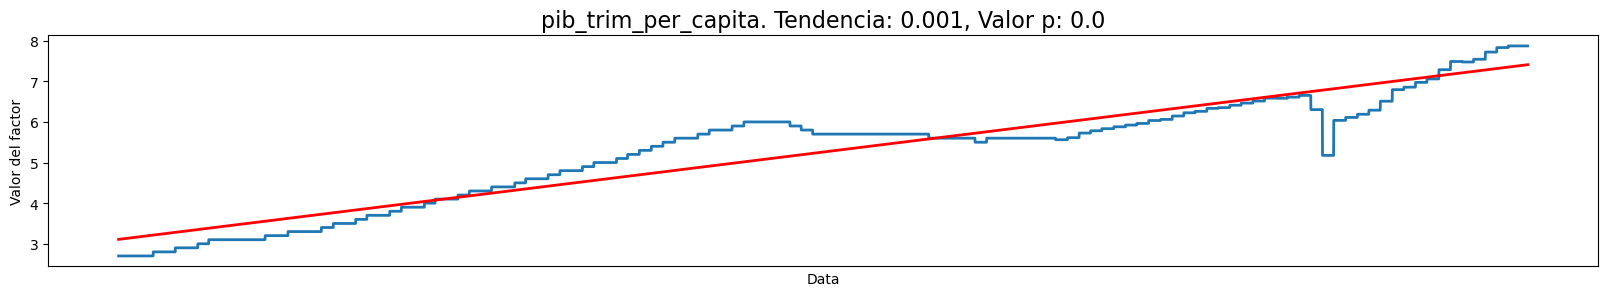

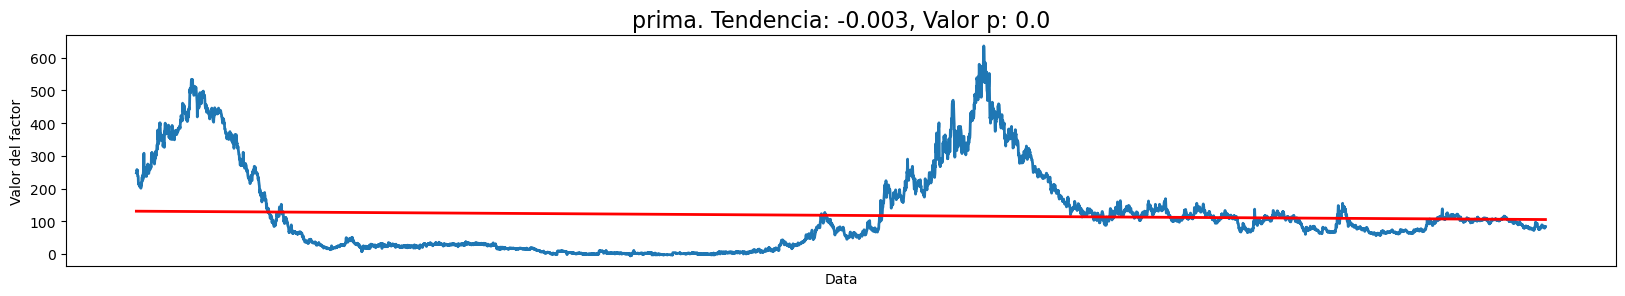

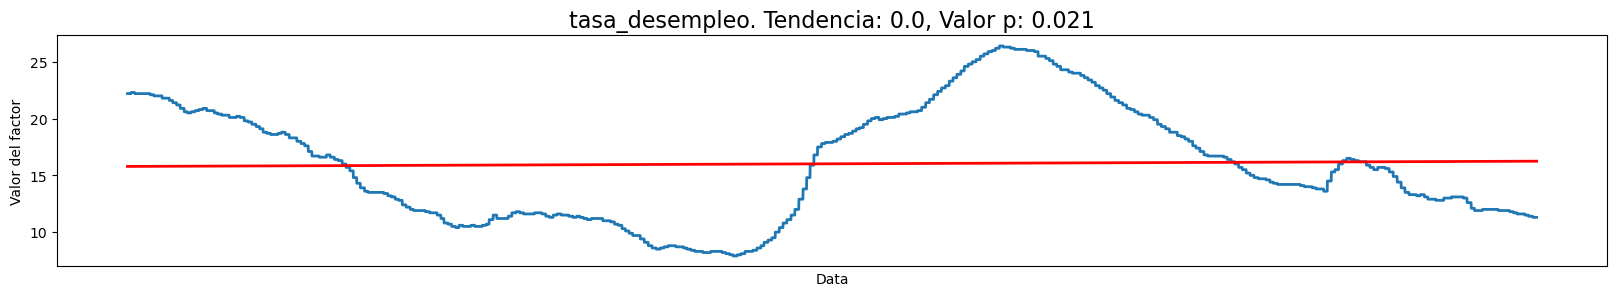

Factor  Tendencia  Valor p  Hay_tendencia
0           ibex_close      0.412    0.000           True
1       deuda_perc_pib      0.010    0.000           True
2  pib_trim_per_capita      0.001    0.000           True
3                prima     -0.003    0.000           True
4       tasa_desempleo      0.000    0.021           True

In [6]:
df['fecha'] = pd.to_datetime(df['fecha'])
columns = df.select_dtypes(include='number').columns
results_list = []

for col in columns:
    current_factor = df[['fecha', col]].dropna()
    y = current_factor[col]
    x = sm.add_constant(range(len(y)))
    model = sm.OLS(y, x)
    results = model.fit()
    tendencia = round(results.params.iloc[1], 3)
    valorP = round(results.pvalues.iloc[1], 3) 
    results_list.append({
            'Factor': col,
            'Tendencia': tendencia,
            'Valor p': valorP,
            'Hay_tendencia': valorP < 0.05
        })
    
    fig, ax = plt.subplots(figsize=(20,3))

    ax.plot(current_factor.index, current_factor[col], label=col, linewidth=2)

    ax.plot(current_factor.index, results.fittedvalues, color='red', linewidth=2)

    ax.set_xlabel('Data')
    ax.set_ylabel('Valor del factor')
    ax.set_title(f'{col}. Tendencia: {tendencia}, Valor p: {valorP}', fontsize=16)
    ax.set_xticks([])
    plt.show()
    
pd.DataFrame(results_list)


**Observaciones**  

- **Cierre del IBEX-35**:  
    - **Tendencia**: 0.412 → Hay una tendencia positiva en los valores del IBEX-35, lo que indica un aumento promedio diario del índice bursátil a lo largo del tiempo.  
    - **Valor p**: 0.0 → La tendencia es estadísticamente significativa, confirmando que el aumento observado no es aleatorio.  

- **Deuda pública**:  
    - **Tendencia**: 0.01 → Existe un aumento muy leve en la deuda pública, sugiriendo una estabilidad relativa con incrementos moderados.  
    - **Valor p**: 0.0 → La tendencia es estadísticamente significativa, validando el pequeño crecimiento.  

- **PIB trimestral por cápita**:  
    - **Tendencia**: 0.001 → Aunque hay una tendencia positiva, el aumento es extremadamente pequeño, lo que podría reflejar el crecimiento paulatino del PIB per cápita en España.  
    - **Valor p**: 0.0 → La tendencia es significativa, mostrando que este crecimiento, aunque moderado, es consistente.  

- **Prima de riesgo**:  
    - **Tendencia**: -0.003 → Existe una tendencia negativa en la prima de riesgo, indicando una reducción gradual a lo largo del tiempo. Esto es coherente con la percepción de una mayor estabilidad económica en España en los últimos años.  
    - **Valor p**: 0.0 → La tendencia es significativa, lo que respalda la disminución observada.  

- **Tasa de desempleo**:  
    - **Tendencia**: 0.0 → No se observa una tendencia clara en los datos. Esto podría deberse a que la tasa de desempleo ha experimentado fluctuaciones sin una dirección definida.  
    - **Valor p**: 0.021 → Aunque la tendencia es significativa, la magnitud de la pendiente es tan baja que no muestra cambios relevantes en el tiempo.  


## 3.4 Serie aditiva o multiplicativa

La interpretación de los componentes de la descomposición se verá influenciada por la naturaleza de la serie. 

En el caso de una serie aditiva, se entiende que la tendencia, estacionalidad y residuales se juntan de forma aditiva para formar la serie total. Es decir, que los efectos de estos tres componentes se agregan de forma lineal, i el cambio de un componente no afecta al resto.

Si, en cambio, nos encontramos una serie multiplicativa, querrá decir que los componentes se juntan de forma multiplicativa i el cambio de uno puede afectar a la magnitud del otro.

“Para poder saber si el modelo es aditivo o multiplicativo se puede hacer la comparación entre los coeficientes de variación de las series diferencia y el cociente” (Aragon, F., 2017).


Para ello realizaremos lo siguiente:

serie_diferenciada = y<sub>t</sub> - y<sub>t-1</sub>

serie_cociente = y<sub>t</sub> / y<sub>t-1</sub>

CVD = (serie_diferenciada_σ / serie_diferenciada_μ) * 100

CVC = (serie_cociente_σ / serie_cociente_μ) * 100

Si observamos que CVC es más pequeño que CVD quiere decir que el modelo es multiplicativo. Si por lo contrario, CVC es mayor que CDV, es que el modelo es aditivo.

In [7]:
df['fecha'] = pd.to_datetime(df['fecha'])

numeric_columns = df.select_dtypes(include='number').columns
results_list = []

for col in numeric_columns:
    current_factor = df[['fecha', col]].dropna()
    diferencia = current_factor[col].diff()
    cociente = current_factor[col].pct_change()
    diferencia = diferencia.replace([np.inf, -np.inf], np.nan).dropna()
    cociente = cociente.replace([np.inf, -np.inf], np.nan).dropna()
    cvd = round(current_factor[col].std() / current_factor[col].mean(), 2)
    cvd_diferencia = diferencia.std() / diferencia.mean()
    cvc = round(cociente.std() / cociente.mean(), 2)
    isCVC = cvc > cvd
    results_list.append({
            'Factor': col,
            'CVC': cvc,
            'CVD': cvd,
            'Aditiva': isCVC
        })
pd.DataFrame(results_list)


Factor    CVC   CVD  Aditiva
0           ibex_close  57.22  0.28     True
1       deuda_perc_pib  45.38  0.36     True
2  pib_trim_per_capita  24.17  0.25     True
3                prima -25.80  1.06    False
4       tasa_desempleo -45.28  0.32    False

**Observaciones**

- **Cierre del IBEX-35**:  
  - **CVC**: 57.22, **CVD**: 0.28 → El coeficiente de variación del cociente es mucho mayor que el de la diferencia. Esto indica que la serie es **multiplicativa**. Es consistente con el comportamiento de índices bursátiles, ya que tienden a mostrar cambios proporcionales en lugar de incrementos absolutos.  

- **Deuda pública**:  
  - **CVC**: 45.38, **CVD**: 0.36 → La serie muestra una naturaleza **multiplicativa**, ya que los cambios proporcionales son más relevantes que los cambios absolutos. Esto tiene sentido, ya que la deuda tiende a variar proporcionalmente con respecto a factores como el crecimiento económico o las políticas fiscales.  

- **PIB trimestral per cápita**:  
  - **CVC**: 24.17, **CVD**: 0.25 → También se observa una naturaleza **multiplicativa**, aunque la diferencia entre **CVC** y **CVD** es menos pronunciada. Esto refleja que los cambios relativos en el PIB per cápita tienen mayor impacto que las variaciones absolutas.  

- **Prima de riesgo**:  
  - **CVC**: -25.80, **CVD**: 1.06 → El coeficiente de variación de la diferencia supera al del cociente, lo que indica que esta serie es **aditiva**. Esto puede deberse a que las variaciones de la prima de riesgo no siguen un patrón proporcional sino que tienen un impacto absoluto más constante.  

- **Tasa de desempleo**:  
  - **CVC**: -45.28, **CVD**: 0.32 → Similar a la prima de riesgo, esta serie es **aditiva**, ya que los cambios absolutos tienen mayor relevancia en su dinámica que los relativos.


## 3.5 Estacionalidad

La estacionalidad es un patrón o ciclo que se va repitiendo a intervalos regulares y puede tener una frecuencia estacional durante un año, o en días concretos como los fines de semana. Es decir, la variabilidad que se puede dar en un rango de fechas puede ser anual, mensual, semanal o diaria. Para analizar la estacionalidad de las distintas series se ha usado seasonal_decompose de la librería de statsmodels.

## 3.5.1 Descomposición estacional por factores

Los resultados de la descomposición estacional se estructuran en:

- Valores originales de la serie
- Tendencia
- Componente estacional
- Residuos: Es el resultado después de eliminar la tendencia y la estacionalidad de los valores originales.


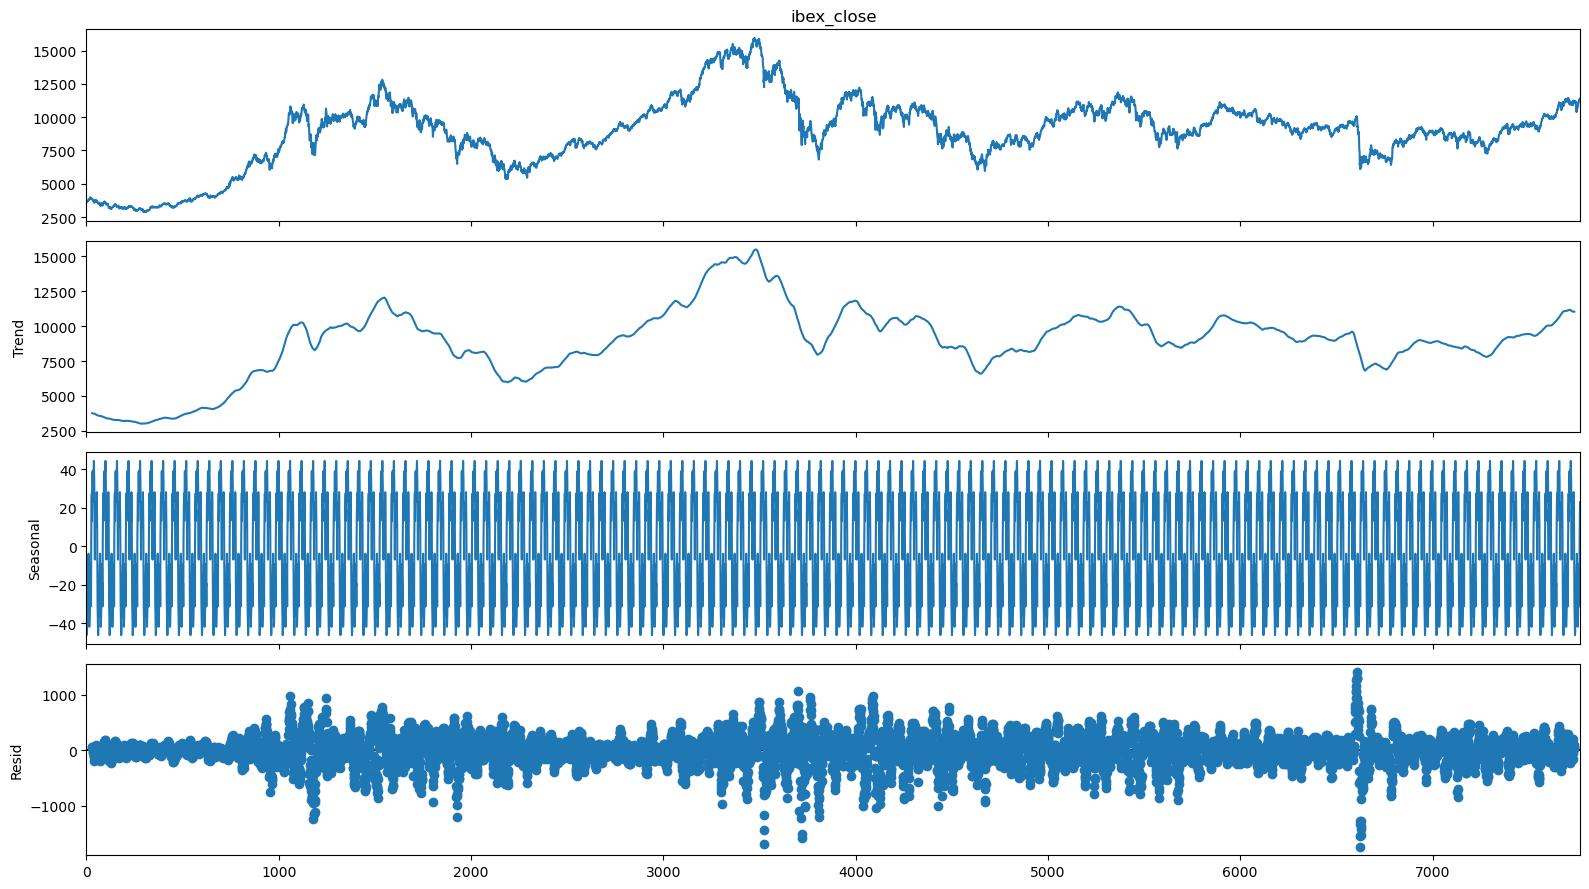

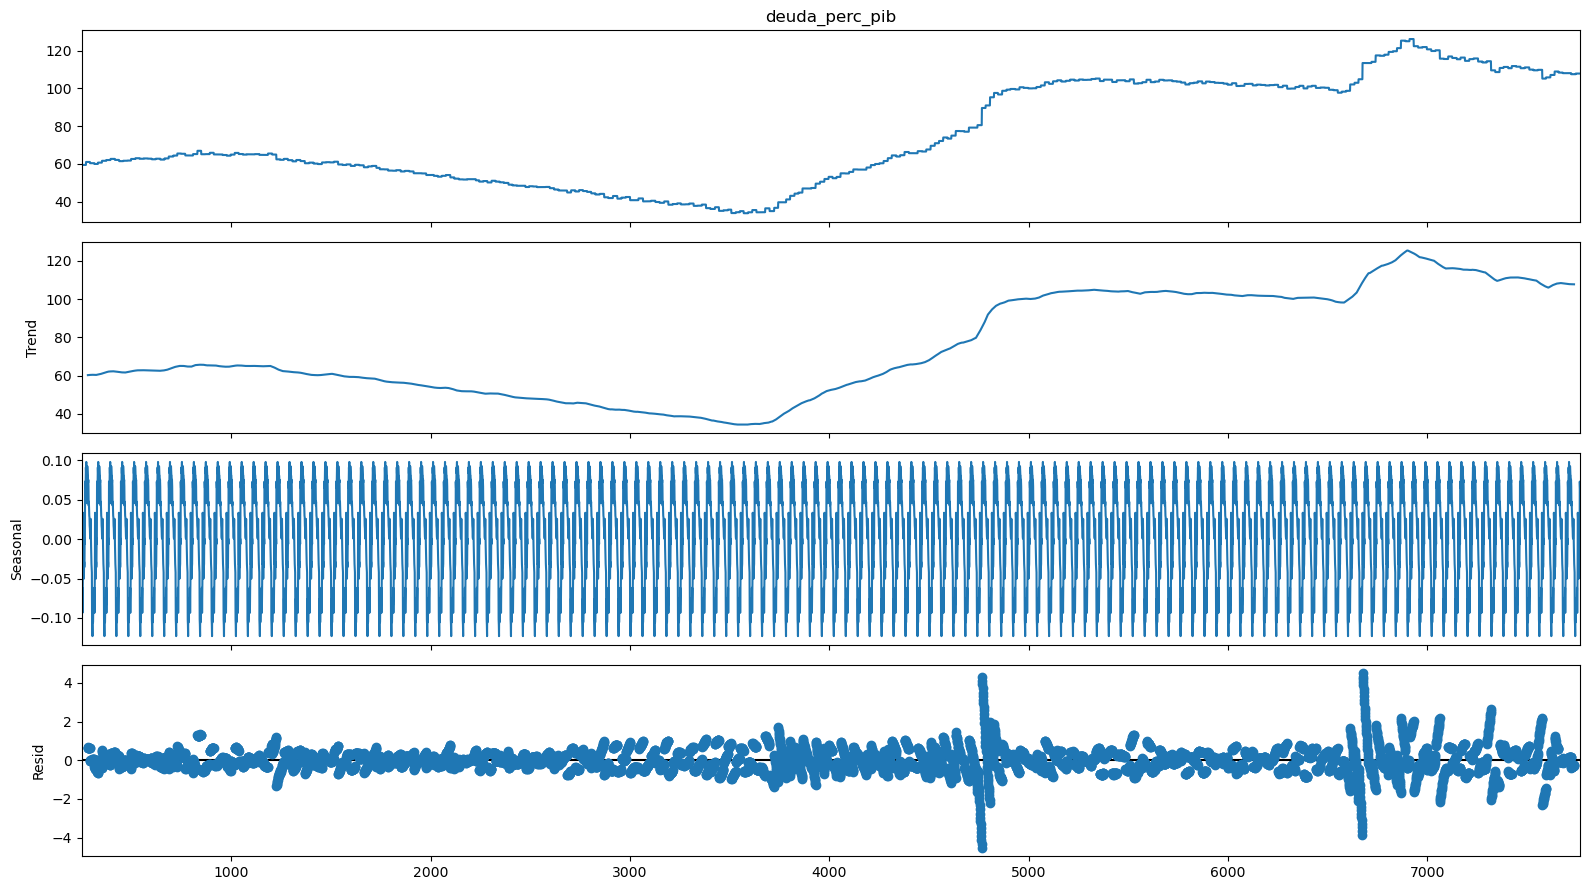

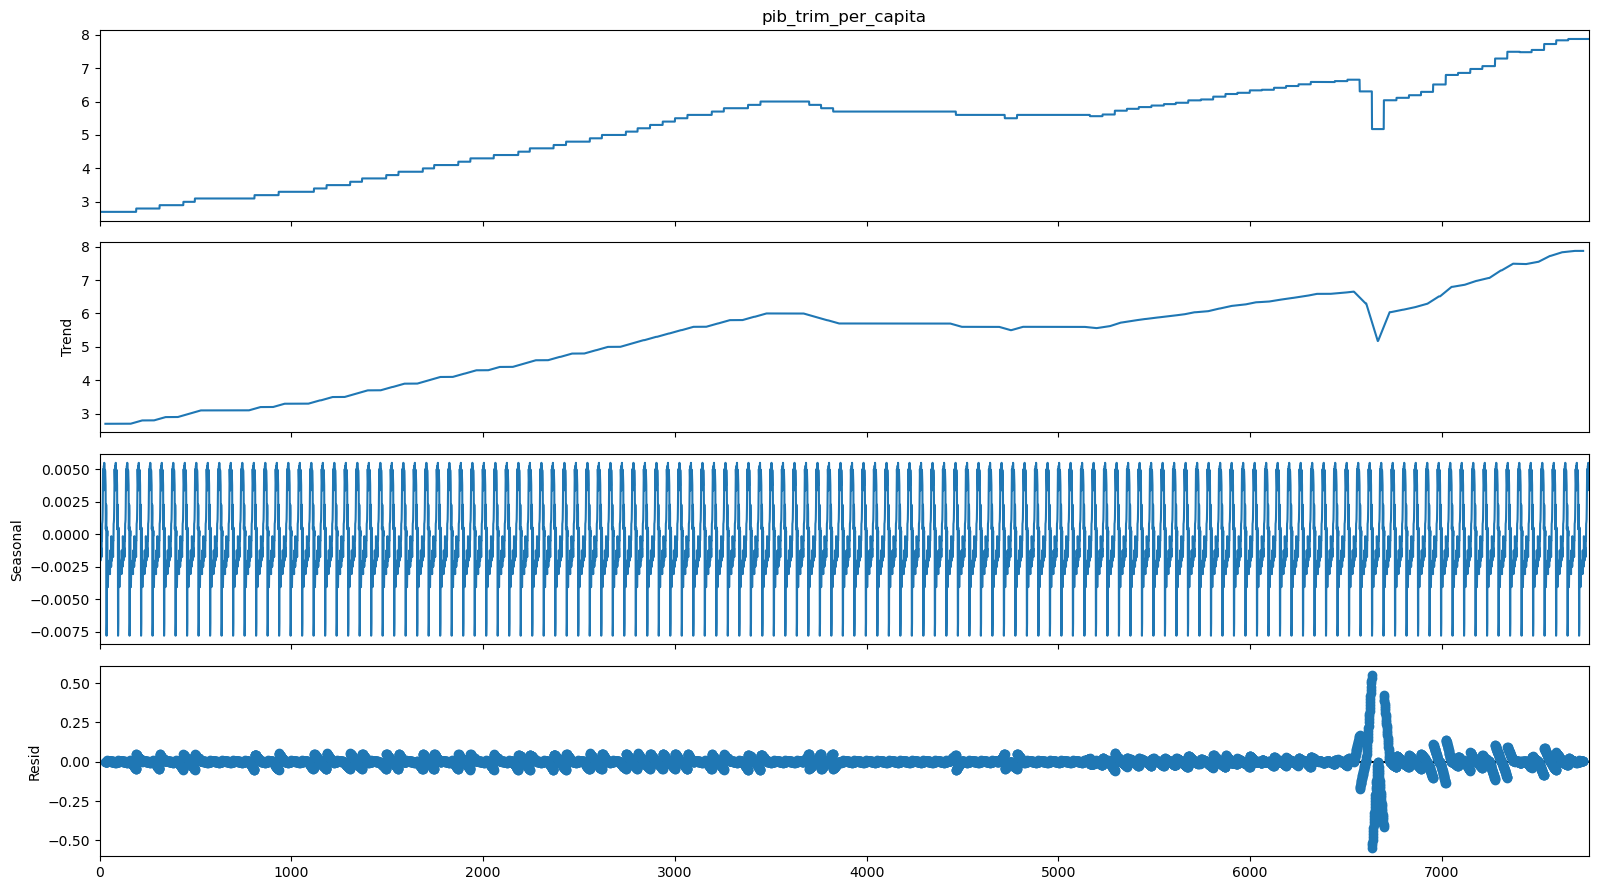

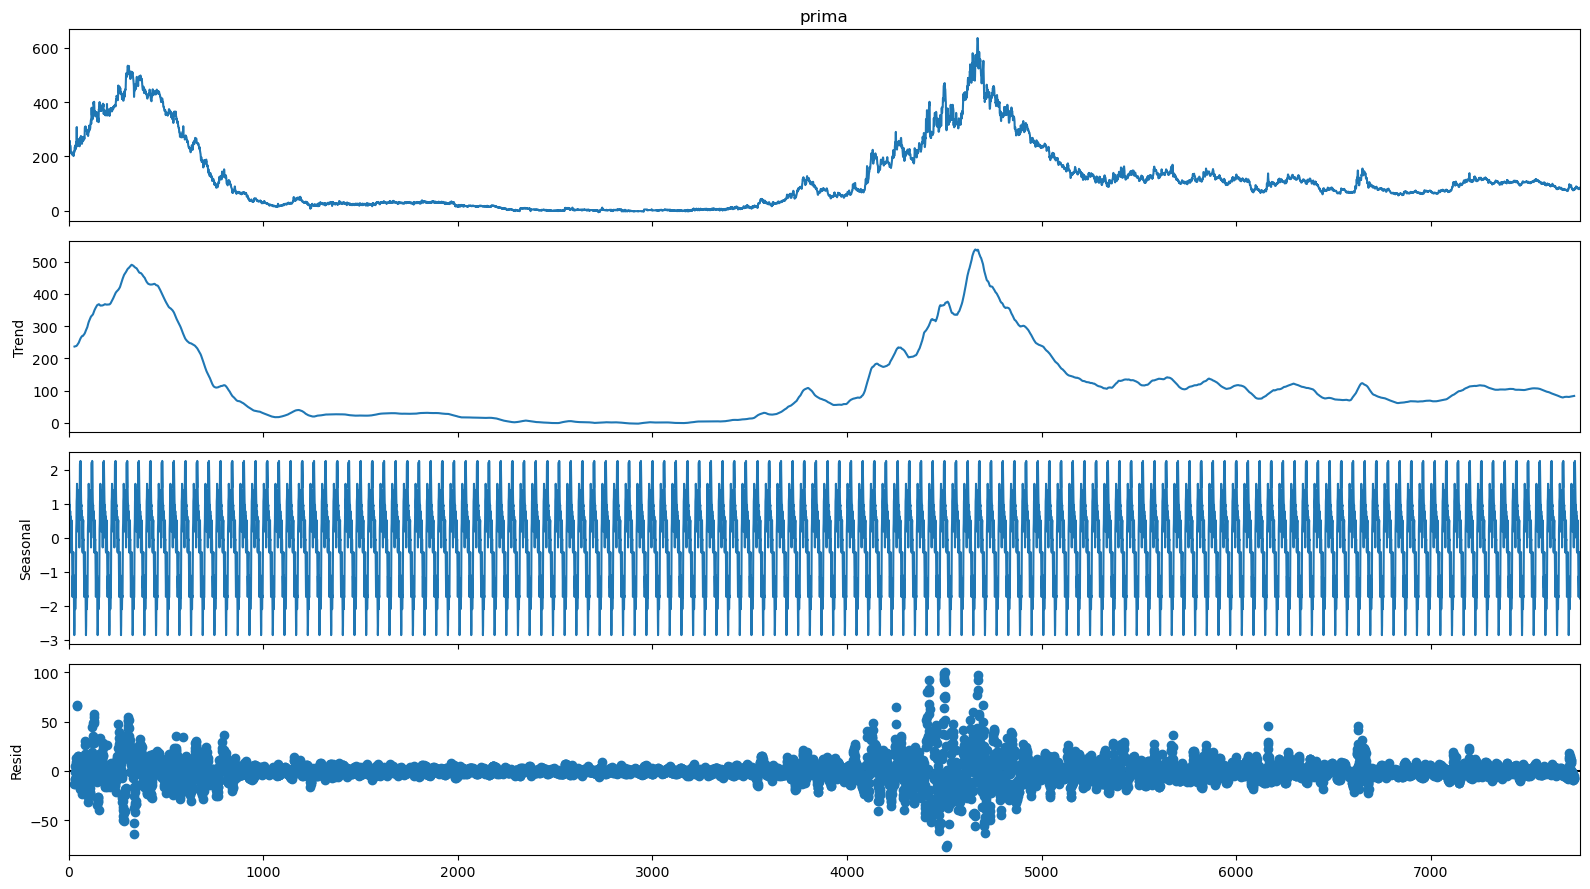

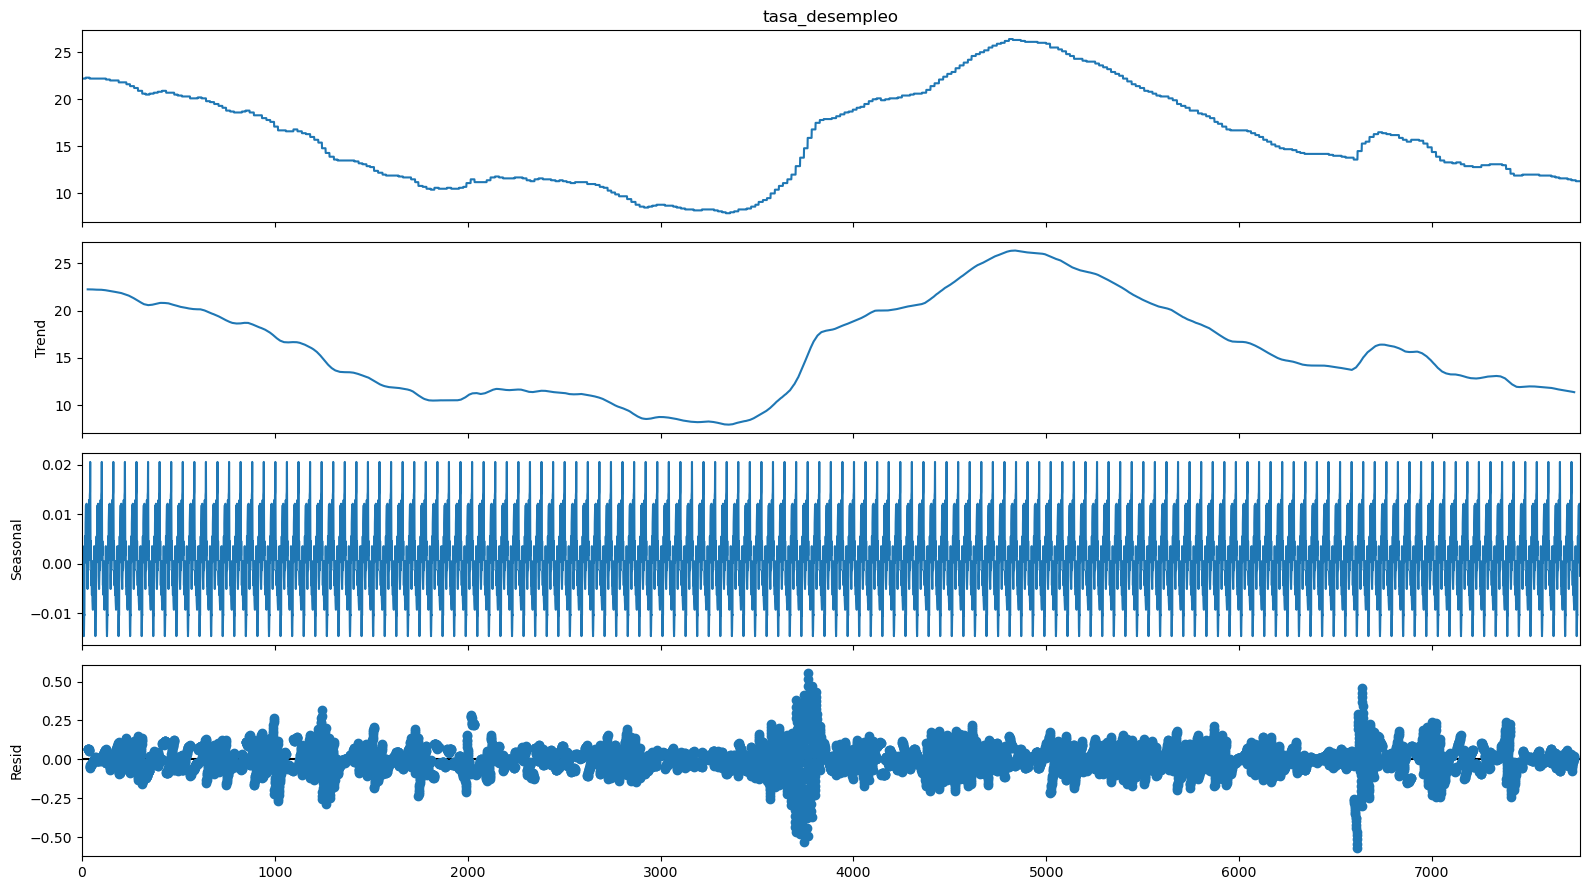

In [17]:
df['fecha'] = pd.to_datetime(df['fecha'])

numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    current_factor = df[['fecha', col]].dropna()
    seasonal = seasonal_decompose(current_factor[col], model='additive', period=60).plot()
    seasonal.set_size_inches((16, 9))
    seasonal.tight_layout()
    plt.show()

**Observaciones**

Podemos observar claramente commo no se ve una estacionalidad clara en las series. Esto podría significar que los patrones que emergen al cambiar el periodo podrían estar relacionados con fluctuaciones de largo plazo.

### 3.5.2 Índice de Variancia Estacional

Para complementar los resultados de la descomposición estacional, podemos calcular el Índice de Variancia Estacional (IVE). Este índice es una medida que se usa para cuantificar la magnitud de la variabilidad estacional en una serie temporal.

**no_tendencia** = $\frac{currentFactorₜ}{\frac{1}{2} \times (\text{currentFactor}_{t-1} + \text{currentFactor}_t)}$

**IVE** = $\frac{∑_t \text{no_tendencia}_t}{Nₘ}$

Donde:

- $currentFactor_t$ representa el factor estacional actual.
- $N_m$: Es el número de muestras en el mes m.

En el caso que los resultados del IVE sean mayores a 1, podremos entender que hay un componente estacional fuerte en el mes específico. Si el valor está por debajo a 1 querrá decir que la variabilidad estacional disminuye. Por último, si se observa un IVE igual a 1, podremos deducir que el componente estacional no contribuye a la variabilidad de la serie.

In [35]:
title = "IVE de las diferentes series temporales"
centered_title = f"<h1 style='text-align: left;'>{title}</h1>"
display(Markdown(centered_title))

results_IVE = {'Meses': [i for i in range(1,13)]}
df['fecha'] = pd.to_datetime(df['fecha'])

numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    current_factor = df[['fecha', col]].dropna()
    current_factor['mes'] = current_factor['fecha'].dt.month
    
    denominador = (0.5 * (current_factor[col].shift(1) + current_factor[col]))
    denominador = denominador.replace(0, pd.NA)
    
    no_tendencia = current_factor[col] / denominador
    no_tendencia = no_tendencia.dropna()
    
    IVE = no_tendencia.groupby(current_factor.mes).mean().to_list()
    
    results_IVE[col] = IVE
    
IVE_df = pd.DataFrame(results_IVE)
display(IVE_df)

<h1 style='text-align: left;'>IVE de las diferentes series temporales</h1>

Meses  ibex_close  deuda_perc_pib  pib_trim_per_capita     prima  \
0       1    1.000118        0.999975             1.000174  0.999449   
1       2    1.000130        1.000232             1.000000  1.007056   
2       3    0.999930        1.000167             1.000000  0.993269   
3       4    1.000455        0.999846             1.000051  1.002283   
4       5    0.999848        1.000184             1.000000  0.999384   
5       6    0.999772        1.000113             1.000000  1.003537   
6       7    1.000056        0.999831             1.000293  0.990718   
7       8    0.999752        0.999975             1.000000  1.002841   
8       9    0.999847        1.000143             1.000000  1.001847   
9      10    1.000307        0.999845             1.000289  1.008203   
10     11    1.000496        1.000184             1.000000  1.000134   
11     12    1.000245        0.999985             1.000000  0.991976   

    tasa_desempleo  
0         0.999964  
1         0.999895  
2         0.999923  
3         0.999939  
4         0.999956  
5         1.000020  
6         0.999950  
7         0.999964  
8         0.999960  
9         0.999959  
10        0.999996  
11        0.999947

**Observaciones**

La mayoría de las series tienen fluctuaciones pequeñas (cercanas a 1), lo que indica que las variaciones estacionales no son muy marcadas.

## 3.6 Autocorrelación (ACF y PACF)

La correlación serial de una serie nos permite ver si hay relación entre las distintas observaciones de la propia serie a lo largo del tiempo. Dependiendo de esta correlación, podremos ver si los valores pasados tienen algún tipo de influencia en las observaciones del futuro. En este caso, se ha analizado la autocorrelación y la autocorrelación parcial con la librería de statsmodels con las funciones plot_acf y plot_pacf.

**ACF**

La función de autocorrelación mide la correlación entre el momento t con varias observaciones del pasado $t-1, t-2 … t-n$. Normalmente, cuanto más lejos en el tiempo, menos significancia habrá en los lags. 

“Los valores pueden ir de -1 a 1. Un valor próximo a 1 indica una correlación fuerte entre intervalos, y, por lo tanto, los valores del día en cuestión suben siguiendo la tendencia del día anterior. Por el contrario, si el valor es negativo, la correlación es a la inversa. Es decir, los valores de hoy suben cuando los de ayer iban a la baja.” (Villalba, R., 2020).

Los resultados de ACF nos pueden ayudar a identificar el valor de la parte autoregressiva p de los modelos ARIMA o SARIMA. 

**PACF**

En el caso de la autocorrelación parcial, los resultados son los mismos que ACF, pero con la diferencia de que en este caso no se tienen en cuenta los intervalos intermedios. Es decir, $corr(y_t y_{t-2})$ no tendría en cuenta la influencia de $y_{t-1}$. Los resultados de PACF nos ayudan a identificar la media móvil de los modelos ARIMA y SARIMA.

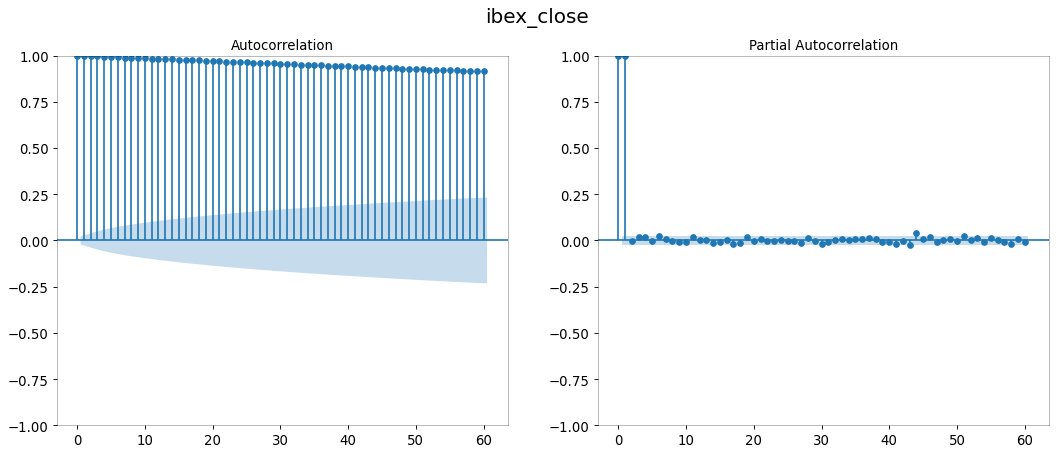

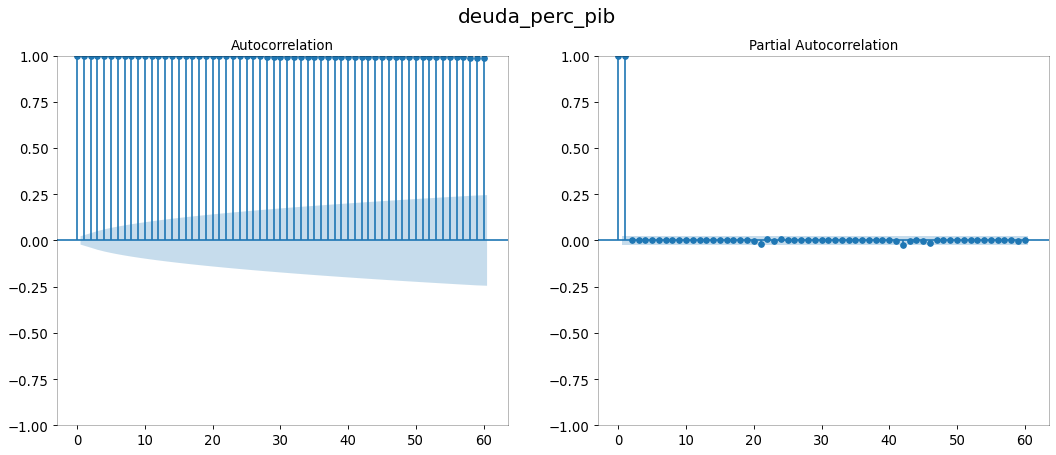

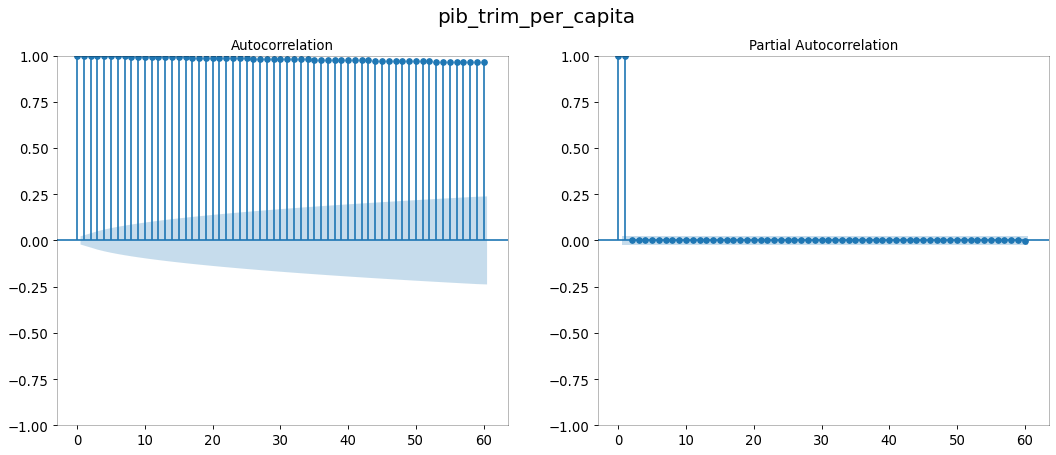

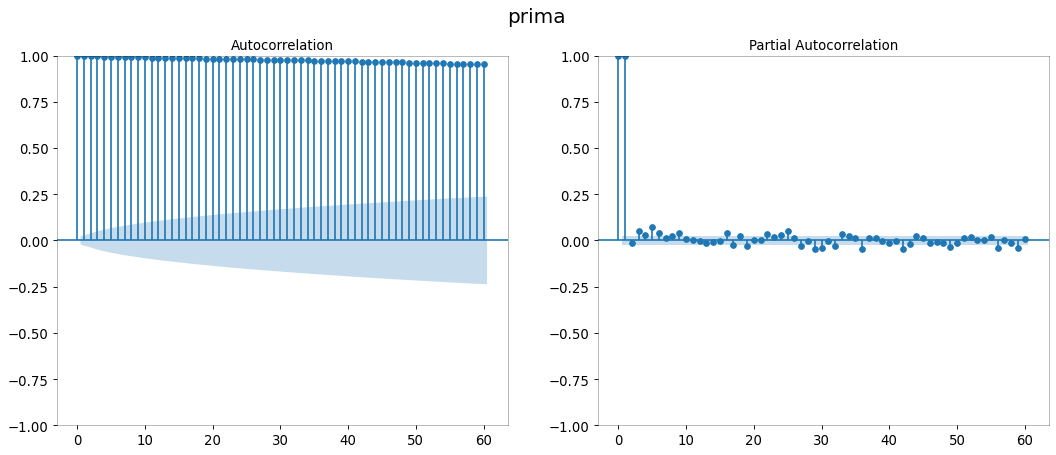

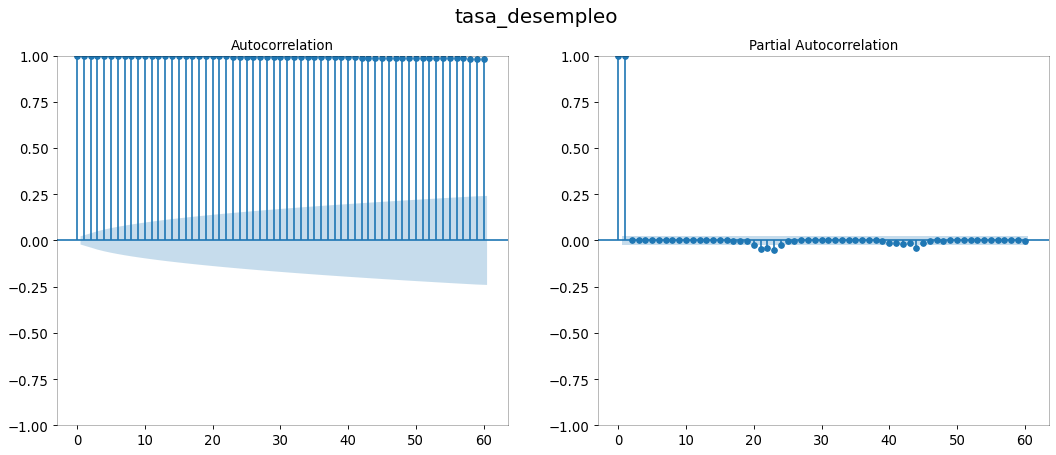

In [37]:
df['fecha'] = pd.to_datetime(df['fecha'])
count = 0
columns = df.select_dtypes(include='number').columns

for col in columns:
    current_factor = df[['fecha', col]].dropna()
    count += 1
    current_factor.set_index('fecha', inplace=True)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
    
    acf = sm.graphics.tsa.plot_acf(current_factor, lags=60, ax=ax1)
    pacf = sm.graphics.tsa.plot_pacf(current_factor, lags=60, ax=ax2, method='ywm')
    
    fig.text(0.5, 0.95, f"{col}",
             fontsize=18, ha='center')
    
    ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
    ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
    ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
    ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

    ax1.tick_params(axis='both', labelsize=12)
    ax2.tick_params(axis='both', labelsize=12)
    plt.show()

**Observaciones**

**Autocorrelación (ACF)**

La autocorrelación muestra una fuerte correlación cercana a 1 en los primeros 20 lags y luego empieza a disminuir levemente en el caso del IBEX-35. En el caso de las demás series, la correlación se extiende por más lags, lo que sugiere patrones de dependencia temporal más prolongados. Para el IBEX-35, este comportamiento indica que los valores de los primeros días están fuertemente relacionados entre sí, lo que sugiere una tendencia persistente en el corto plazo. Esto implica que los movimientos de los primeros días se reflejan fuertemente en los días siguientes. Este tipo de comportamiento es común en series financieras, donde las fluctuaciones a corto plazo suelen estar autocorrelacionadas.

Por otro lado, las otras series presentan una autocorrelación más persistente a lo largo del tiempo, lo que sugiere que tienen una dependencia temporal más duradera.


**Autocorrelación Parcial (PACF)**

En la autocorrelación parcial (PACF), los primeros dos lags muestran una correlación de 1, mientras que el resto de los lags se acercan a 0. Esto indica que, para todas las series analizadas, los primeros dos periodos tienen una fuerte correlación, pero después la correlación se desvanece rápidamente. Este patrón sugiere que las series podrían seguir un proceso de tipo AR(1) o AR(2), es decir, los valores en el tiempo actual dependen principalmente de los dos valores previos, pero no muestran dependencia significativa después de esos dos lags. Este comportamiento es consistente con series temporales que tienen memoria a corto plazo, en las que las observaciones recientes influyen de forma importante en las futuras, pero no más allá de esos primeros lags.

Este comportamiento es común en datos económicos y financieros, donde las fluctuaciones de corto plazo suelen tener un impacto más inmediato, pero una vez transcurridos unos pocos periodos, la influencia de los valores previos se vuelve mínima.

## 3.7 Estacionariedad

La estacionariedad en una serie significa que las propiedades estadísticas como la media, la varianza, y la autocorrelación se mantienen constantes a lo largo del tiempo. Si estas propiedades no muestran constancia en el tiempo, la serie se considera no estacionaria. Por el contrario, si estas propiedades son estables, concluiremos que la serie es estacionaria.

Una serie no estacionaria puede mostrar una tendencia, ya sea positiva o negativa, lo que provoca que la media no sea constante en el tiempo. Además, en muchos casos, la varianza también puede cambiar, afectando la estabilidad de la serie.

En una serie estacionaria, la media y la varianza permanecen estables en el tiempo, y no hay evidencia de una tendencia creciente o decreciente. Además, las correlaciones entre observaciones dependen solo de la distancia temporal (lag) entre ellas, no del tiempo absoluto.

Para poder analizar si una serie es estacionaria se ha usado la prueba de Dickey-Fuller (Numxl, 2024) con la librería statsmodels  y la función adfuller()

$Δy_t=α+p⋅y_{t-1} +ϵ_t $

Donde:

- $Δy_t$: es la diferencia de la serien en el tiempo $t(y_t-y_{t-1})$
- $α$: es el termino constante (para incluir una media)
- $p⋅y_{t-1}$: evalúa la raíz unitaria. Si $p=0$, hay raíz unitaria y la serie no es estacionaria
- $ϵ_t$ : es el término del error aleatorio


In [44]:
factores_ADF = []

df['fecha'] = pd.to_datetime(df['fecha'])

numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    current_factor = df[['fecha', col]].dropna()
    result = adfuller(current_factor[col])
    new_row = {
        'Factor': col,
        'EstadisticP_ADF': round(result[0], 2),
        'ValorP': round(result[1], 2),
        'lags': result[2],
        'N_observaciones': result[3],
        '5%': round(result[4]['5%'], 2),
        'CoefRM': result[5],
        'Es_estacionaria': result[1] < 0.05
    }
    factores_ADF.append(new_row)

factores_ADF_df = pd.DataFrame(factores_ADF)

factores_ADF_df['Es_estacionaria'] = factores_ADF_df['Es_estacionaria'].replace({True: 'Sí', False: 'No'})
factores_ADF_df


Factor  EstadisticP_ADF  ValorP  lags  N_observaciones    5%  \
0           ibex_close            -2.46    0.13     5             7762 -2.86   
1       deuda_perc_pib             0.13    0.97    23             7494 -2.86   
2  pib_trim_per_capita            -0.59    0.87     0             7767 -2.86   
3                prima            -1.75    0.41    35             7732 -2.86   
4       tasa_desempleo            -1.36    0.60    26             7741 -2.86   

         CoefRM Es_estacionaria  
0  96627.666399              No  
1   2014.788835              No  
2 -39009.748185              No  
3  49788.408985              No  
4 -24936.316937              No

**Observaciones**

- **IBEX-35**: El valor p de 0.13 es mayor que el umbral de significancia estándar de 0.05, lo que sugiere que no podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria, es decir, no es estacionaria. El estadístico ADF de -2.46 es mayor que el umbral de 5% (-2.86), lo que también respalda la conclusión de que la serie no es estacionaria. Dado que la serie del IBEX-35 tiene una tendencia persistente y está influenciada por diversos factores macroeconómicos y políticos, la falta de estacionariedad puede reflejar estos efectos.

- **Deuda Pública**: El valor p de 0.97 es mucho mayor que 0.05, lo que indica que no podemos rechazar la hipótesis nula de no estacionariedad. Por lo tanto, la serie no es estacionaria. El estadístico ADF positivo (0.13) también es una señal de que la serie no tiene una tendencia clara hacia la estacionariedad. La deuda pública tiende a mostrar cambios estructurales y persistentes a lo largo del tiempo debido a políticas fiscales, lo que puede hacer que esta serie sea no estacionaria.

- PIB per cápita**: El valor p de 0.87 es mayor que 0.05, por lo que no podemos rechazar la hipótesis nula de no estacionariedad, y la serie no es estacionaria. El estadístico ADF de -0.59 también es mayor que el umbral del 5% (-2.86), lo que respalda que la serie no es estacionaria. El PIB per cápita suele prsentar cambios estructurales a largo plazo debido a cambios en la economía, por lo que es común que esta serie no sea estacionaria.

- **Prima de riesgo**: El valor p de 0.41 es mayor que 0.05, lo que sugiere que no podemos rechazar la hipótesis nula de no estacionariedad. La serie no es estacionaria. El estadístico ADF de -1.75 está por encima de los umbrales del 5% (-2.86), lo que indica que la serie no es estacionaria. La prima de riesgo puede estar influenciada por factores globales y económicos que cambian a lo largo del tiempo, lo que contribuye a la no estacionariedad de la serie.

- **Tasa de desempleo**: El valor p de 0.60 es mayor que 0.05, lo que indica que no podemos rechazar la hipótesis nula de no estacionariedad. Por lo tanto, la serie no es estacionaria. El estadístico ADF de -1.36 es también mayor que el umbral de 5% (-2.86), lo que refuerza la conclusión de que la serie no es estacionaria. La tasa de desempleo es una variable económica que puede verse afectada por políticas macroeconómicas, ciclos económicos y otros factores, lo que puede hacer que la serie sea no estacionaria debido a su comportamiento cambiante a lo largo del tiempo.

## 3.8 Heterocedasticidad

La presencia de heterocedasticidad en las series temporales puede perjudicar la capacidad de predicción de los modelos, ya que implica que la variabilidad de los errores no es constante a lo largo del tiempo. Esto puede llevar a estimaciones ineficientes de los parámetros y a predicciones menos precisas. Por esta razón, se ha analizado si las series presentan heterocedasticidad.

Es importante entender que la heterocedasticidad significa que la variabilidad de los errores (o residuos) no es constante. En otras palabras, la dispersión de los valores de la serie puede crecer o decrecer en diferentes partes del espacio temporal, lo que indica que la varianza depende de la posición en la serie. Esto contrasta con la homocedasticidad, en la que la variabilidad se mantiene estable.

En el caso de una serie heterocedástica, la varianza inestable provoca que en ciertas secciones de la serie los errores sean mayores, lo que podría influir negativamente en el ajuste del modelo. Para detectar la heterocedasticidad en las series, se han utilizado las pruebas de Breusch-Pagan y de White, implementadas con la librería statsmodels a través de las funciones het_breushpagan y het_white.

In [9]:
factorsBP = []

count = 0
df['fecha'] = pd.to_datetime(df['fecha'])

numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    current_factor = df[['fecha', col]].dropna()    
    count += 1
    modelo = sm.OLS(current_factor[col], sm.add_constant(range(len(current_factor))))
    resultado_bp = sm.stats.diagnostic.het_breuschpagan(modelo.fit().resid, modelo.fit().model.exog)
    resultado_white = sm.stats.diagnostic.het_white(modelo.fit().resid, modelo.fit().model.exog)

    new_row = {
        'Factor': col,
        'EstadisticP_Pagan': round(resultado_bp[0], 2),
        'ValorP_Pagan': round(resultado_bp[1], 2),
        'EstadisticP_Ajustado': resultado_bp[2],
        'ValorP_Ajustado': resultado_bp[3],
        'Resultado_Pagan': int(round(resultado_bp[1], 2) < 0.05),
        'EstadisticP_White': round(resultado_white[0], 2),
        'ValorP_White': round(resultado_white[1], 2),
        'Resultado_White': int(round(resultado_white[1], 2) < 0.05)
    }
    factorsBP.append(new_row)

factorsBP_df = pd.DataFrame(factorsBP)
    
factorsBP_df.Resultado_Pagan = factorsBP_df['Resultado_Pagan'].replace({0: "No", 1: "Sí"})
factorsBP_df.Resultado_White = factorsBP_df['Resultado_White'].replace({0: "No", 1: "Sí"})

factorsBP_df

Factor  EstadisticP_Pagan  ValorP_Pagan  EstadisticP_Ajustado  \
0           ibex_close             875.97           0.0            987.055657   
1       deuda_perc_pib             604.19           0.0            656.810447   
2  pib_trim_per_capita              20.23           0.0             20.281638   
3                prima             735.26           0.0            811.925407   
4       tasa_desempleo              27.61           0.0             27.702523   

   ValorP_Ajustado Resultado_Pagan  EstadisticP_White  ValorP_White  \
0    4.577962e-204              Sí             886.44           0.0   
1    5.986956e-139              Sí            1274.16           0.0   
2     6.781519e-06              Sí              70.54           0.0   
3    6.044240e-170              Sí             742.63           0.0   
4     1.452631e-07              Sí            1254.73           0.0   

  Resultado_White  
0              Sí  
1              Sí  
2              Sí  
3              Sí  
4              Sí

**Observaciones**

**Breusch-Pagan**

Esta prueba evalúa si los errores en un modelo de regresión presentan varianza constante (homocedasticidad). Vemos que todos los factores presentan valores extremadamente bajos de 𝑝, lo que permite rechazar la hipótesis nula de homocedasticidad con un nivel de significancia estándar (5%). Por lo tanto, todos los factores son heterocedásticos según esta prueba, indicando que la varianza de los errores no es constante.

**White**

La prueba de White evalúa heterocedasticidad considerando posibles efectos de interacciones o términos no lineales. En este caso vemos también como todos los factores muestran valores de  𝑝 iguales a 0, indicando una fuerte evidencia contra la hipótesis nula de homocedasticidad. Por lo tanto, todos los factores también son heterocedásticos según esta prueba. Esto refuerza los hallazgos de Breusch-Pagan, ya que se confirma la no estabilidad de la varianza en los residuos.

## 3.9 Anomalías en los datos

Por último, analizaremos las posibles anomalías que hay en nuestros datos. Para ello, usaremos **IsolationForest**, una técnica basada en el aislamiento de observaciones. De esta manera podremos detectar donde se encuentran los valores atípicos.

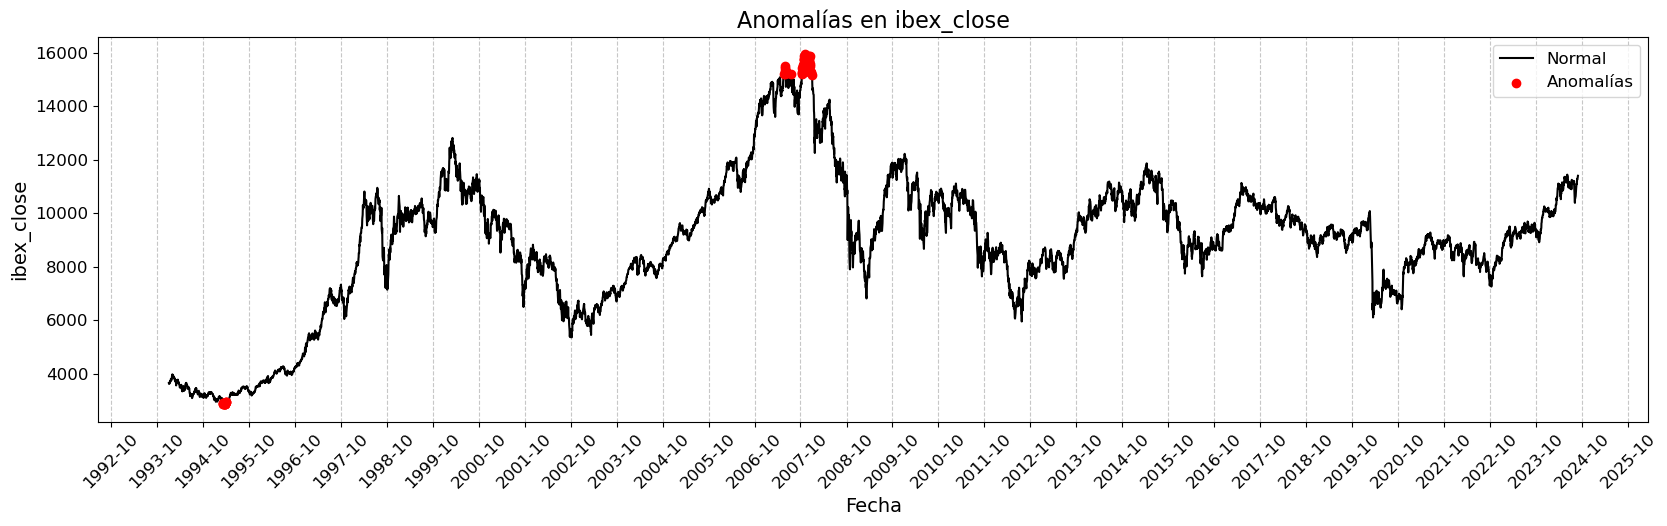

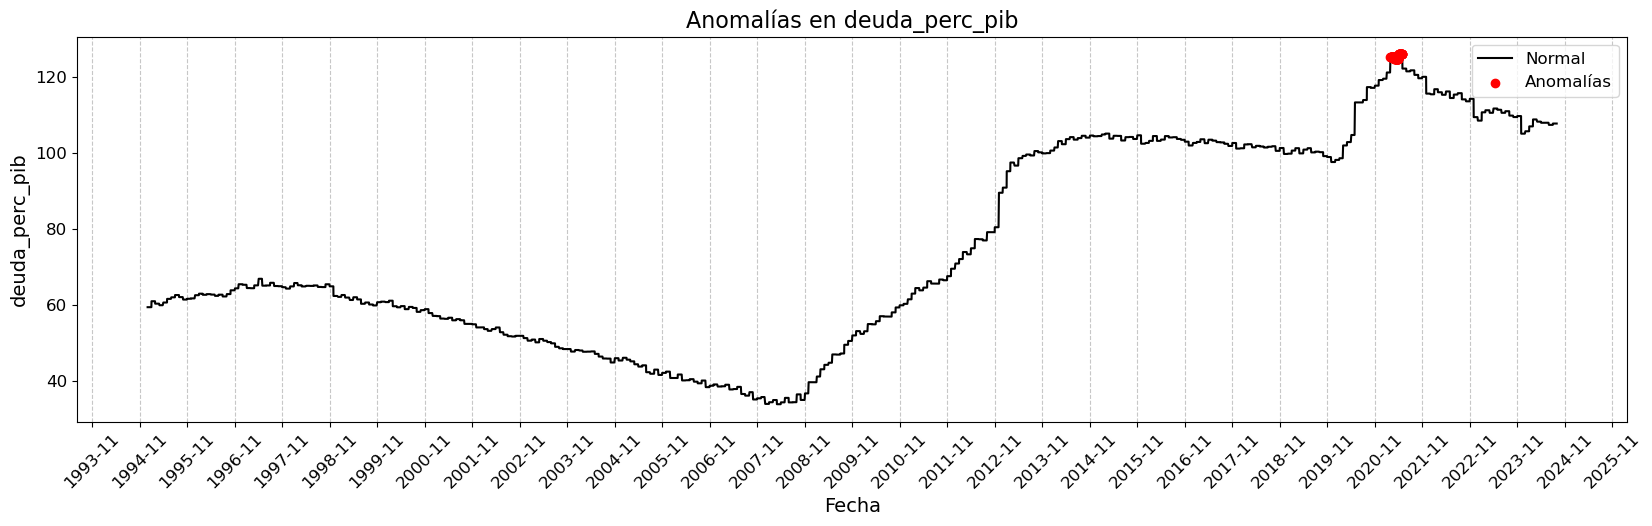

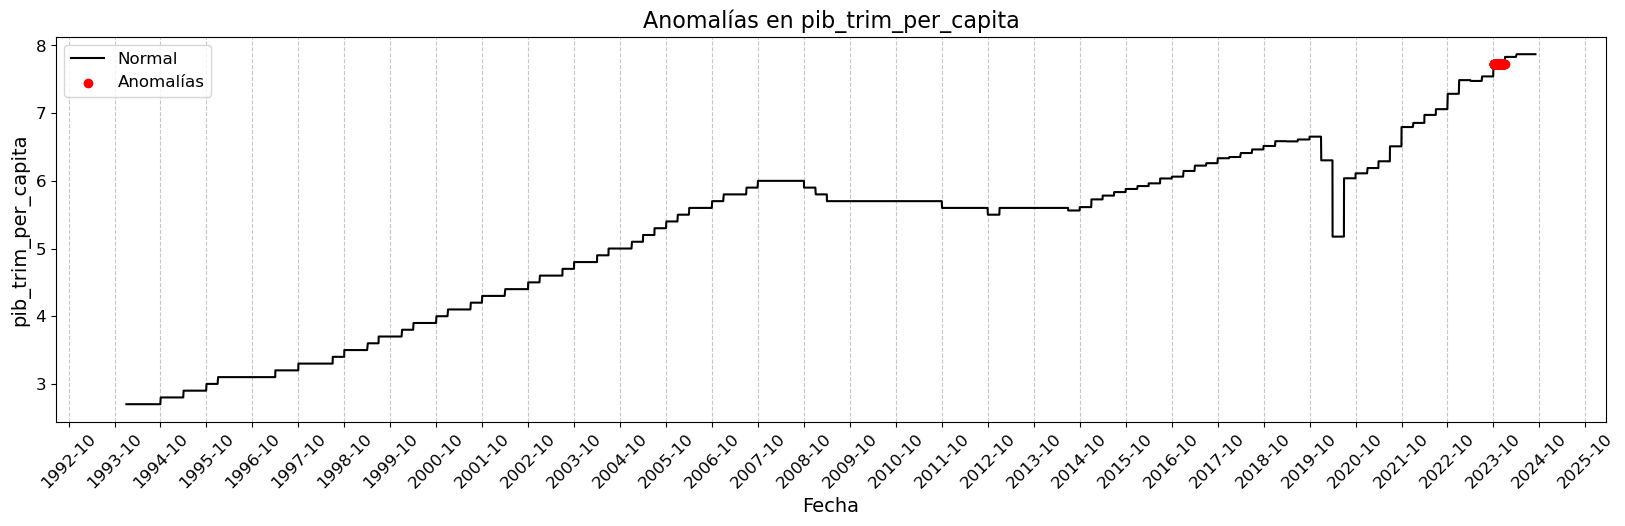

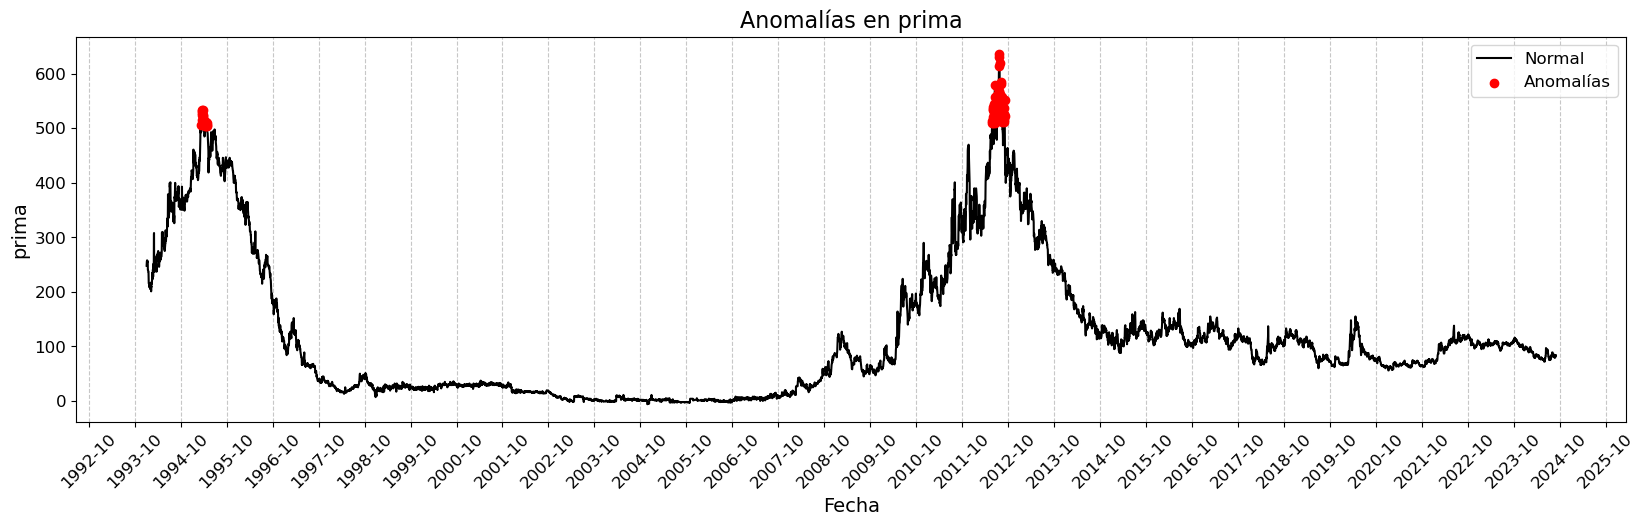

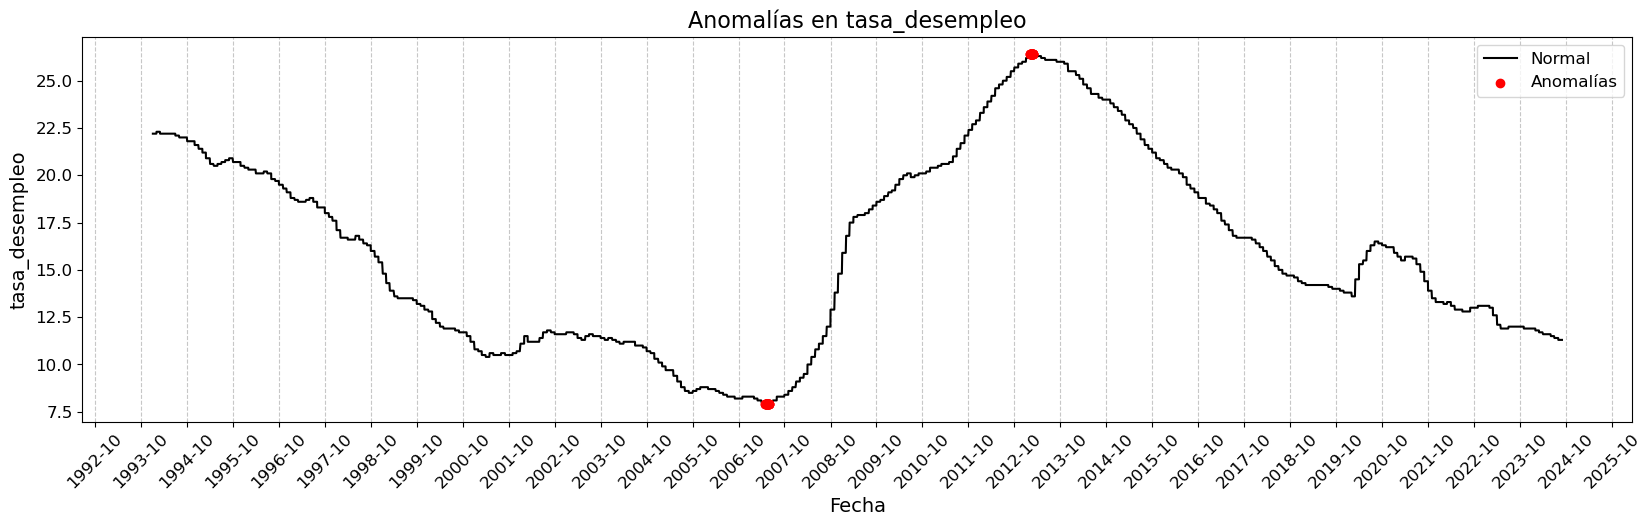

In [14]:
count = 0
df['fecha'] = pd.to_datetime(df['fecha'])

columns = df.select_dtypes(include='number').columns

for col in columns:
    current_factor = df[['fecha', col]].dropna()
    current_factor.set_index('fecha', inplace=True) 
    count += 1
    outliers_fraction = float(.01)
    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(current_factor[col].values.reshape(-1, 1))
    data = pd.DataFrame(np_scaled, index=current_factor.index) 
    model = IsolationForest(contamination=outliers_fraction, random_state=42)
    model.fit(data)
    current_factor['anomaly'] = model.predict(data)
    anomalies = current_factor.loc[current_factor['anomaly'] == -1, [col]]

    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(current_factor.index, current_factor[col], color='black', label='Normal')
    ax.scatter(anomalies.index, anomalies[col], color='red', label='Anomalías', zorder=5)
    ax.set_title(f'Anomalías en {col}', fontsize=16)
    ax.set_xlabel("Fecha", fontsize=14)
    ax.set_ylabel(col, fontsize=14)
    plt.legend(fontsize=12)

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12)) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.show()


**Observaciones**

- **Cierre del IBEX-35**: En la serie del Cierre del IBEX-35, se identificaron valores atípicos entre los años 2006 y 2007. Este periodo coincide con eventos significativos en los mercados financieros, como las crisis subprime que afectaron la economía global. La volatilidad de los mercados y las caídas repentinas de los índices bursátiles en este periodo provocaron fluctuaciones inusuales en el valor del IBEX-35. Los valores atípicos podrían reflejar reacciones extremas de los inversionistas ante la incertidumbre económica.

- **Deuda pública**: En la serie de Deuda pública, se detectó un valor atípico en 2020, justo cuando se produjo la crisis del COVID-19. La pandemia provocó un aumento significativo en la deuda pública de muchos países debido a los estímulos fiscales, los paquetes de ayuda y los programas de emergencia para hacer frente a los efectos económicos de la crisis sanitaria. Este valor atípico podría reflejar una anomalía en el crecimiento de la deuda durante ese año debido a los gastos extraordinarios y las medidas excepcionales adoptadas por los gobiernos.

- **PIB trimestral por cápita**: En la serie del PIB trimestral por cápita, se observan dos valores atípicos en 2023. Estos podrían estar relacionados con fluctuaciones anómalas en la producción económica, posiblemente debido a cambios estructurales en la economía o eventos macroeconómicos imprevistos. En 2023, algunas economías experimentaron desafíos por el ajuste a la pospandemia, lo que podría haber causado una desviación temporal de los niveles esperados de PIB per cápita. Los factores políticos, la inflación o las tensiones geopolíticas podrían haber influido en la variabilidad observada.

- **Prima de riesgo**: La serie de Prima de riesgo muestra valores atípicos en dos momentos clave: 1995 y 2012. En 1995, la prima de riesgo de varios países europeos experimentó picos debido a la crisis de la deuda en varios países emergentes, que afectaron a la estabilidad financiera global. En 2012, durante la crisis de la zona euro, varios países de la eurozona, como España e Italia, enfrentaron aumentos significativos en sus primas de riesgo debido a la incertidumbre sobre la sostenibilidad de la deuda soberana y la estabilidad de la moneda única europea. Estos valores atípicos reflejan momentos de elevada tensión económica y política en Europa.

- **Tasa de desempleo**: La serie de la Tasa de desempleo presenta valores atípicos en 2007 y 2012. En 2007, el valor atípico podría estar relacionado con los cambios estructurales en el mercado laboral antes de la crisis financiera global de 2008, que comenzó a afectar a muchos países en 2008, especialmente en el mercado laboral. El valor atípico en 2012 se relaciona con los efectos prolongados de la crisis económica global, particularmente en los países de la eurozona, donde las tasas de desempleo se dispararon debido a la recesión económica y las políticas de austeridad. Estos picos reflejan momentos de gran tensión en los mercados laborales y la economía global.

## 4. Análisis del concept drift en el IBEX-35

El concept drift ocurre cuando las relaciones estadísticas entre las características de entrada y las etiquetas objetivo cambian con el tiempo, produciendo un problema en el modelo. Este fenómeno es común en sistemas en producción donde los datos evolucionan y presentan una alta volatilidad como es el caso de las finanzas.

La monitorización del concept drift puede tener mucho sentido cuando se hace el aprendizaje por lotes. Estos modelos se entrenan en un conjunto de datos histórico fijo, con lo que el modelo puede quedar atrapado en patrones históricos y pierde precisión cuando los nuevos datos presentan un patrón completamente diferente. En el caso de que esto ocurra, será necesario recopilar nuevos datos y reentrenar el modelo completo, lo que puede ser costoso en tiempo y recursos. En el caso de los modelos en línea, el concept drift no presenta tanto un problema, debido a que estos modelos se entrenan y actualizan continuamente con cada nueva muestra de datos. En nuestro trabajo, los modelos se entrenan cada día, con los nuevos datos que se han registrado en el IBEX-35. Esta capacidad de aprendizaje incremental les permite adaptarse más rápidamente al concept drift, ya que pueden integrar información más reciente en el modelo. Pero, esto no significa que el problema esté completamente resuelto. Depende del concept drift, la adaptación puede ser lenta. Por ejemplo, si tenemos un drift súbito, pueden surgir problemas como la pérdida de patrones importantes del pasado. Es por ello, que monitorizar el concept drift en nuestro aprendizaje en línea puede beneficiar todavía más las predicciones. En este caso, se han usado dos métodos para detectar el concept drift: ADWIN y KSWIN.

In [19]:
def plot_data(stream, drifts=None):
    """
    Visualizes a time series and its distribution, highlighting detected concept drifts.

    Parameters:
    stream : array-like
        The time series data to visualize, provided as a list or array of numerical values.
    drifts : array-like, optional
        A list of indices where concept drifts were detected. If not provided, no drifts are marked.

    Returns
    None
        Displays a plot with the time series and distribution, and marks drift points if any.
    """
    fig = plt.figure(figsize=(7, 3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])

    ax1.grid()
    ax1.plot(stream, label='Stream', color='blue')
    ax1.set_title('Data Stream')
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Normalized Values')

    ax2.grid(axis='y')
    ax2.hist(stream, bins=30, color='gray', alpha=0.7, label='Data Distribution')
    ax2.set_title('Distribution')

    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red', linestyle='--', label='Drift Detected')
    plt.legend()
    plt.show()

### 4.1 ADWIN

Adaptative Windowing (ADWIN, por sus siglas en inglés) es un algoritmo diseñado para detectar el concept drift en flujos de datos de manera eficiente. El objetivo principal es mantener el modelo actualizado eliminando automáticamente datos antiguos que ya no representan correctamente la distribución actual. “ADWIN mantiene eficientemente una ventana de longitud variable de elementos recientes, de modo que se sostiene que no ha habido cambios en la distribución de datos. Esta ventana se divide en dos subventanas que se utilizan para determinar si se ha producido un cambio.” (River, 2023). Este cambio se basa en test de hipótesis estadísticos donde primero se calcula la diferencia entre las medias de las dos subventanas y luego se evalúa si esta diferencia excede un umbral estadísticamente significativo, considerando el error estándar. En caso de que se interprete el drift los datos más antiguos se eliminan para así poder dejar la parte más relevante del flujo. 

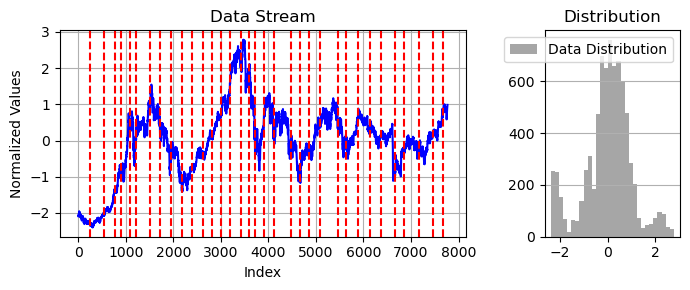

In [16]:
stream = df['ibex_close'].values  

stream = (stream - stream.mean()) / stream.std()

drift_detector = drift.ADWIN()
drifts = []

for i, val in enumerate(stream):
    drift_detector.update(val) 
    if drift_detector.drift_detected:
        drifts.append(i)

plot_data(stream, drifts)


**Observaciones**

Se observa que el modelo identifica varias zonas donde se producen cambios significativos en la distribución de los datos a lo largo del tiempo.

El concept drift es un fenómeno en el que la distribución de los datos cambia con el tiempo, lo que significa que el comportamiento o las relaciones en los datos dejan de ser estables, afectando la efectividad de los modelos predictivos. Esto es común en contextos financieros, donde factores externos, eventos inesperados o cambios económicos pueden modificar significativamente el comportamiento de una serie temporal.

En este caso, el algoritmo ADWIN ha detectado múltiples puntos de drift en el cierre del IBEX-35, los cuales están representados en el gráfico por líneas rojas discontinuas. Estos puntos indican que, en esos momentos, la distribución de los valores del índice ha cambiado de forma significativa. Esto es importante, ya que refleja que las dinámicas del mercado, tal vez influenciadas por eventos económicos, políticos o sociales, pueden estar afectando el comportamiento de los valores de la bolsa.

### 4.2 KSWIN

El método Kolmogorov-Smirnov Windowing (KSWIN, por sus siglas en inglés) utiliza el test de Kolmogorov-Smirnov para detectar cambios conceptuales en flujos de datos unidimensionales. KSWIN detecta el concept drift “si la diferencia en las distribuciones de datos empíricos entre las ventanas es demasiado grande, ya que provienen de la misma distribución.” (River, 2023). Para usar este método se ha usado KSWIN de la librería River. A continuación, presentamos la configuración de los parámetros que se ha usado:

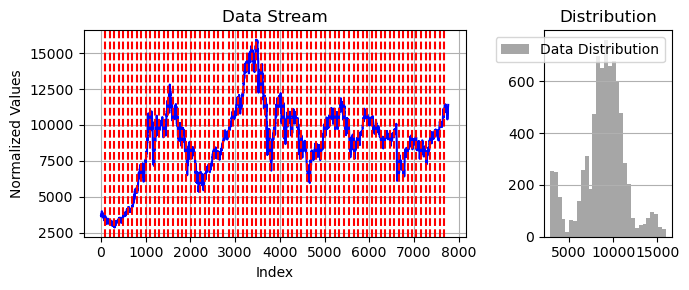

In [18]:
data_stream = df['ibex_close'].values

kswin = drift.KSWIN(seed=42)

drifts = []

for i, val in enumerate(data_stream):
    _ = kswin.update(val)
    if kswin.drift_detected:
        drifts.append(i)

plot_data(data_stream, drifts)

**Observaciones**

Al aplicar el algoritmo KSWIN (a diferencia de ADWIN), se ha detectado una cantidad significativamente mayor de concept drifts en la serie temporal del cierre del IBEX-35. KSWIN es un algoritmo de detección de concept drift más sensible, y su capacidad para detectar múltiples drifts a lo largo del tiempo refleja la alta variabilidad y los posibles cambios abruptos en la dinámica del mercado.